<a href="https://colab.research.google.com/github/niteshavagabond/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NETFLIX MOVIES AND TV SHOWS CLUSTERING**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** **Sonali Kaushal**
##### **Team Member 2 -** **Somya Hingorani**
##### **Team Member 3 -** **Harsh Vardhan**
##### **Team Member 4 -** **Prateek Gupta**

# **Project Summary -**

 Exploring the dataset is the first step, then we clean the dataset like handling null values then we done some feature engineering after that we done EDA after EDA we done some data preprocessing like word tokenization, punctuation removal, stop words removal, stemming, text vectorization after that done PCA for dimensionality reduction, we used word cloud to find content of genres then apply K-means clustering use silhouette score to find best clusters, and Hierarchical clustering - Agglomerative clustering, then topic modeling using LDA.

# **GitHub Link -**

https://github.com/niteshavagabond/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

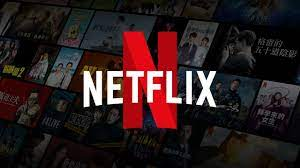

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Importing Libraries

In [ ]:
# Importing various required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import matplotlib.cm as cm

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel


#Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load the dataset

In [ ]:
#Loading dataset
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

#First look of dataset

In [ ]:
# First five observations
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# Last five observations
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Statistical info
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [ ]:
# Dataset's shape
df.shape

(7787, 12)

In [ ]:
# Dataset's columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Datatype of given columns
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#Data Cleaning

##Checking duplicate values

In [ ]:
# Checking duplicated entries.
df.duplicated().sum()

0

##Handling Null Values

In [ ]:
# Percentage of null values.
for col in df.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


**Null values are present in director, cast, country, date_added, and rating.Since there are very few null values present in date_added and rating we will remove them from the data.**

In [ ]:
# Number of null values in date_added.
df.date_added.isnull().sum()

10

In [ ]:
# Number of null values in rating.
df.rating.isnull().sum()

7

In [ ]:
# Removing null values in date_added and rating
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['rating'], inplace=True)

In [ ]:
# Replacing null values in director
df['director']= df['director'].fillna('')

In [ ]:
# Replacing null values in cast
df['cast']= df['cast'].fillna('')

In [ ]:
# Null values in Country
country_null_values = df.country.isnull().sum()
print(f'We had observed that variable country had {country_null_values} null values in it, we will replace these null values with the most occurring country which is United States.')

We had observed that variable country had 505 null values in it, we will replace these null values with the most occurring country which is United States.


In [ ]:
# Replacing null values in country with the most occuring one
df['country'].fillna('United States', inplace=True)

#Feature Engineering

##date_added column

In [ ]:
# Converting date_added into datetime format
df["date_added"]= pd.to_datetime(df['date_added'], dayfirst=True, errors = 'coerce')

In [ ]:
# Creating new features to store day, month and year seperately.
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

##listed_in Column

**Genres are extracted and re-defined accordingly. TV and Movie genres are separately defined.Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.**

In [ ]:
#Make a copy 
a = df.copy()

In [ ]:
#Extracting genre from listed_in
a['listed_in'] = a.listed_in.apply(lambda row: row.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [ ]:
#Renaming genre
renaming_genre = {'International TV Shows': '-','TV Dramas': 'Drama','TV Sci-Fi & Fantasy': 'SciFiFantasy','Dramas': 'Drama' ,'International Movies': '-','Horror Movies': 'Horror','Action & Adventure': 'ActionAdventure',
'Independent Movies': '-','Sci-Fi & Fantasy': 'SciFiFantasy','TV Mysteries': 'Mystery','Thrillers': 'Thriller','Crime TV Shows': 'Crime','Docuseries': 'Documentary','Documentaries': 'Documentary', 'Sports Movies': 'Sports','Comedies':'Comedy','Anime Series': 'Anime','Reality TV': 'Reality','TV Comedies': 'Comedy','Romantic Movies': 'Romance',
'Romantic TV Shows': 'Romance', 'Science & Nature TV': 'Science','Movies': '-','British TV Shows': '-','Korean TV Shows': '-','Music & Musicals': 'Music','LGBTQ Movies': 'LGBTQ',
'Faith & Spirituality': 'Spirituality',  "Kids' TV": 'Kids','TV Action & Adventure': 'ActionAdventure','Spanish-Language TV Shows': '-','Children & Family Movies': 'Family', 'TV Shows': '-',
'Classic Movies': 'Classic','Cult Movies': 'Cult','TV Horror': 'Horror','Stand-Up Comedy & Talk Shows':'Comedy, TalkShow','Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 'Anime Features':'Anime',
'TV Thrillers': 'Thriller','Classic & Cult TV':'Classic, Cult'}

In [ ]:
#Function to extract Genre
def genre_replace(row, renaming_genre = renaming_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in renaming_genre:
      if '-' not in renaming_genre[word]:
       new_text.append(renaming_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))
  

df['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df['Genres'] = df['Genres'].apply(lambda row: row.split(', '))

In [ ]:
#List of genre
(df.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

In [ ]:
# Genre df
df['Genres']

0                 [Drama, SciFiFantasy]
1                               [Drama]
2                              [Horror]
3       [ActionAdventure, SciFiFantasy]
4                               [Drama]
                     ...               
7782                            [Drama]
7783                     [Drama, Music]
7784               [Documentary, Music]
7785                          [Reality]
7786               [Documentary, Music]
Name: Genres, Length: 7770, dtype: object

#**1. Exploratory Data Analysis**

#Content type on Netflix

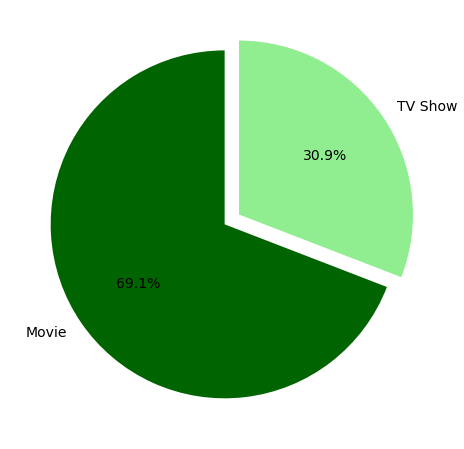

In [ ]:
# pie chart Size
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['type'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['type'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart 
colors = ['darkgreen', 'lightgreen']


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

**69.1% of the content available on Netflix are movies and remaining 30.9% are TV Shows.**

#Content growth over the years

In [ ]:
pip install --upgrade "kaleido==0.1.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


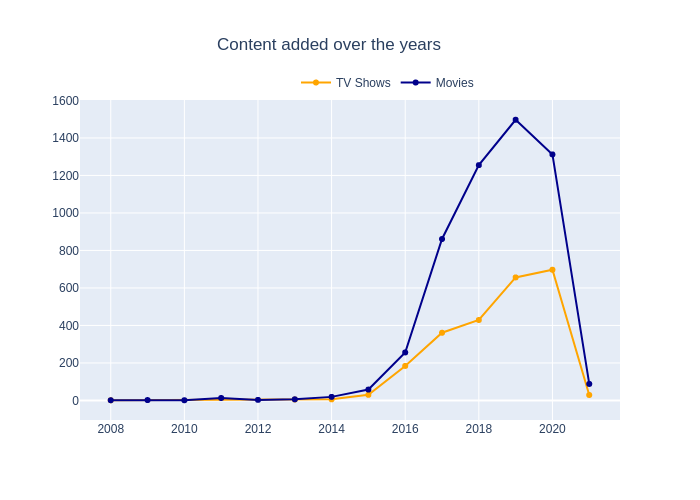

In [ ]:
# Plot growth of the contents over the years.
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="orange"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="darkblue"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)


fig.show('png')


**Given Line Plot shows, growth in the number of movies on Netflix is much higher than tv shows.**

**From 2015 we can see a noticeable growth in the number of movies and tv shows uploaded by Netflix on its platform**.

**The highest number of movies and tv shows got added in 2019 and 2020**.

**Also, very few movies and tv shows got added in 2021**.

 

##In which month do most movies and tv shows get added?

In [ ]:
# Dataframe to store month values and counts.
months_df = pd.DataFrame(df.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)

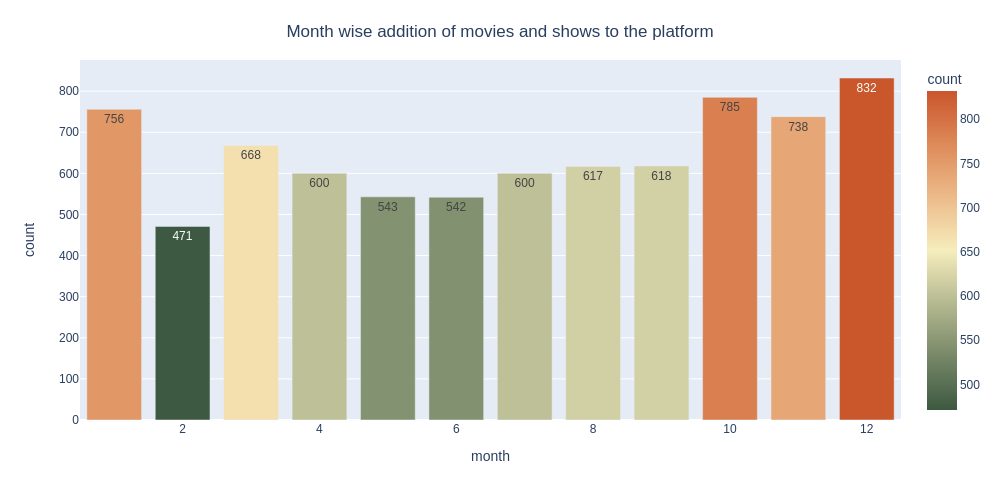

In [ ]:
#Let's get the plot
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count',color_continuous_scale='fall')
fig.update_layout(title={'text': 'Month wise addition of movies and shows to the platform','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},
autosize=False,width=1000,height=500)
fig.show('png')


**Most of the content is uploaded either by year ending or beginning.**

**October, November, December, and January are months in which many shows and movies get uploaded to the platform.**

**It might be due to the winter, as in these months people may stay at home and watch shows and movies in their free time.**

##Which days are more prominent?

In [ ]:
# Dataframe to store day values and count.
days_df = pd.DataFrame(df.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)

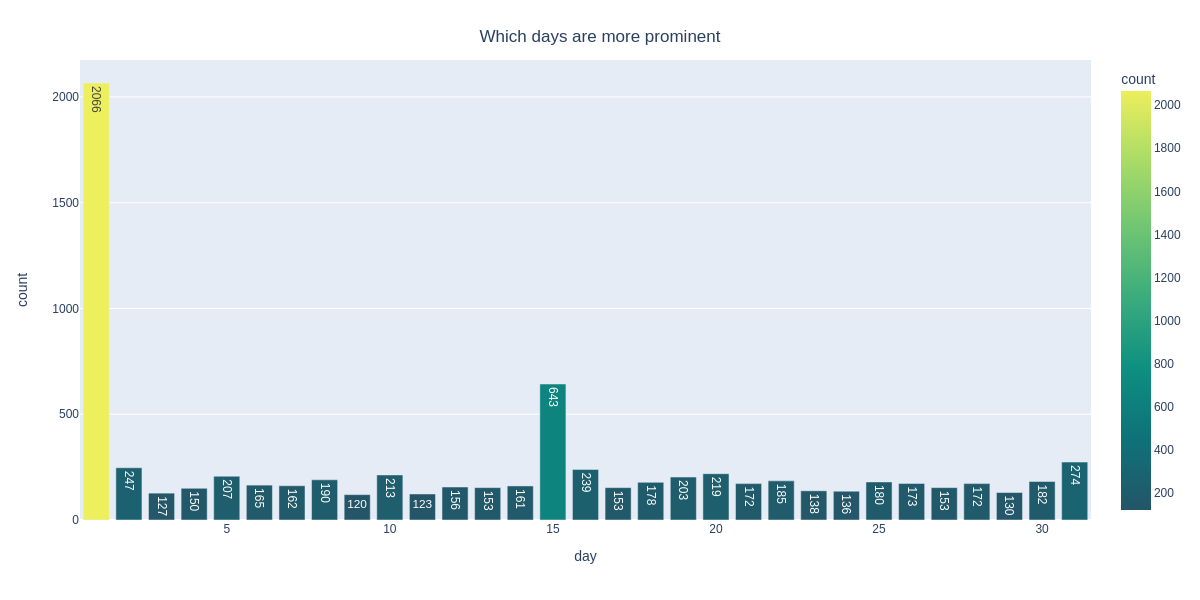

In [ ]:
#Let's get the plot
fig = px.bar(days_df, x="day", y="count", text_auto=True, color='count', color_continuous_scale='aggrnyl')
fig.update_layout(title={'text': 'Which days are more prominent','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},autosize=False,width=1200,
height=600)
# fig.show()
fig.show('png')

 **Most of the content gets uploaded in the beginning and the middle of the month.**

##Top 10 Countries that produced content on Netflix

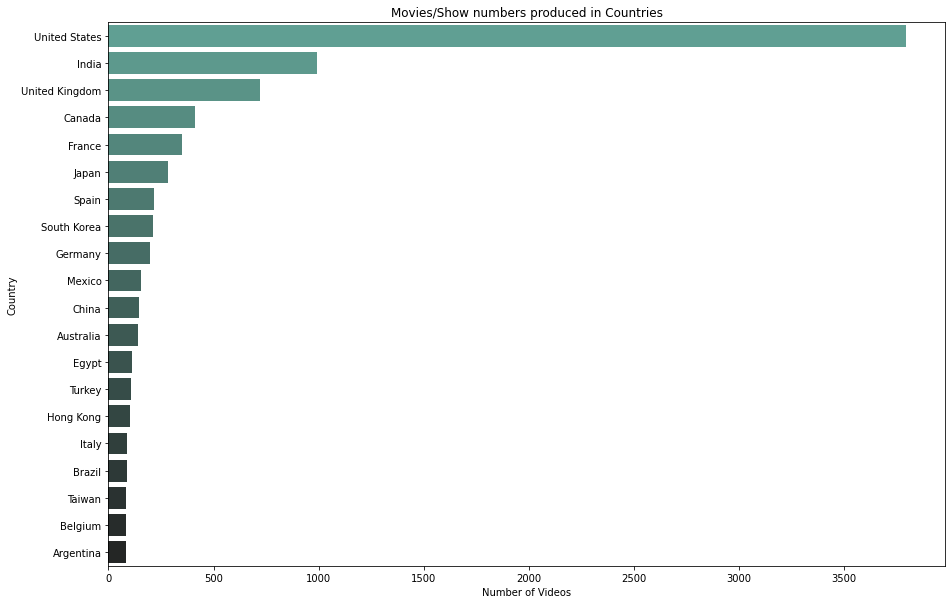

In [ ]:
# plot of countries based on content
a = df[df.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'country', x = 'id',data = a , palette='dark:#5A9_r')
a = plt.title('Movies/Show numbers produced in Countries')
a = plt.ylabel('Country')
a = plt.xlabel('Number of Videos')
top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()



*   **The majority of the content providers are in the above top-ten countries.**
*   **Among which USA, India, and Uk create more than half of the tv shows and movies on the platform.**





##Different Ratings on the Platform

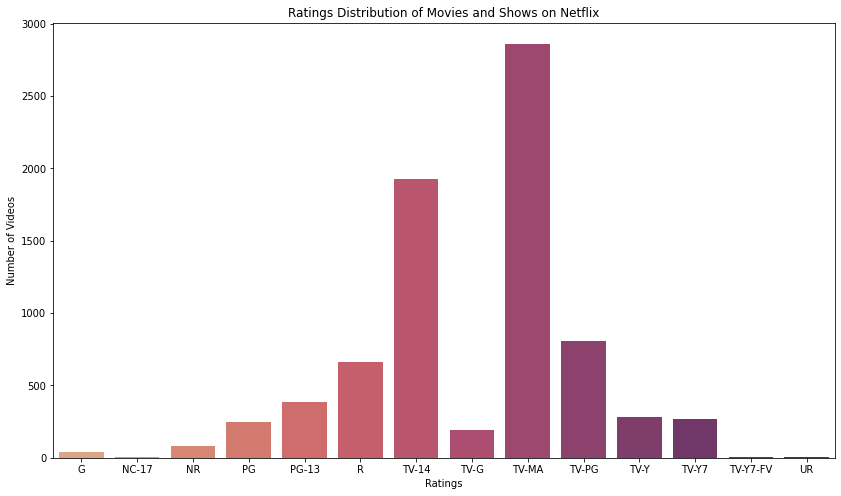

In [ ]:
#Plot of rating given in dataset
a = plt.figure(figsize=(14,8))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x= d['rating'], y=d['show_id'], palette='flare')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

**Most content on Netflix is rated for Mature Audiences and over 14 years old**

## Top Genres on the Platform

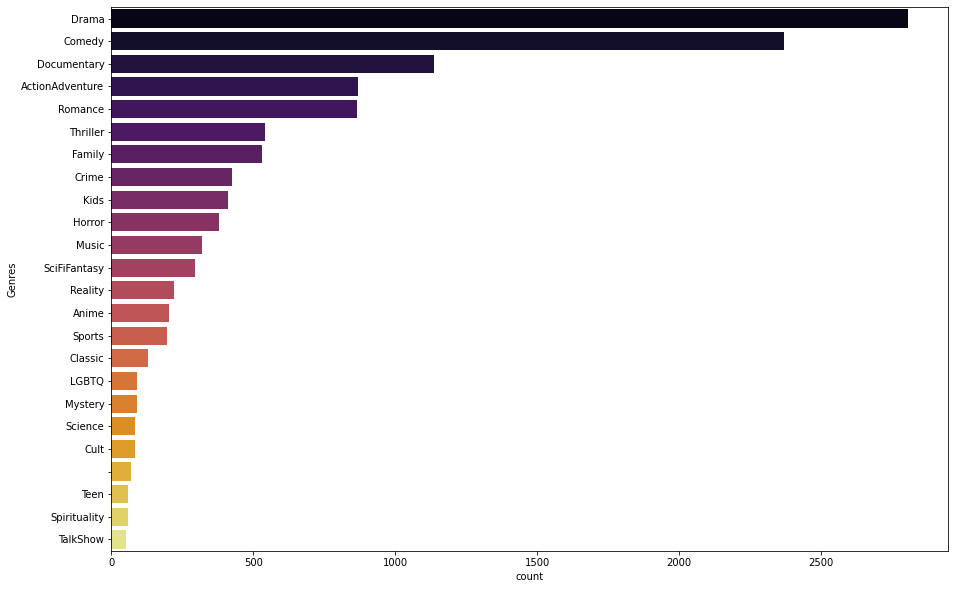

In [ ]:
# Plot of Genres
a = df.loc[:,['show_id','title','country', 'Genres']].copy()
a = a.explode('Genres')
genre_list = a.Genres.unique()
group = a.groupby('Genres').agg(count = ('show_id','count')).sort_values('count', ascending= False).reset_index()
plt.figure(figsize=(15,10))
_ = sns.barplot(y = 'Genres', x = 'count',data = group , palette='inferno')

**Top Genres on Netflix are found to be :  Drama, Comedy, Documentary, Action and Adventure, Romance etc.**

##Which directors have most number of the movies and tv shows?

In [ ]:
# Replace the null values in director.
df['director']=df['director'].fillna('')

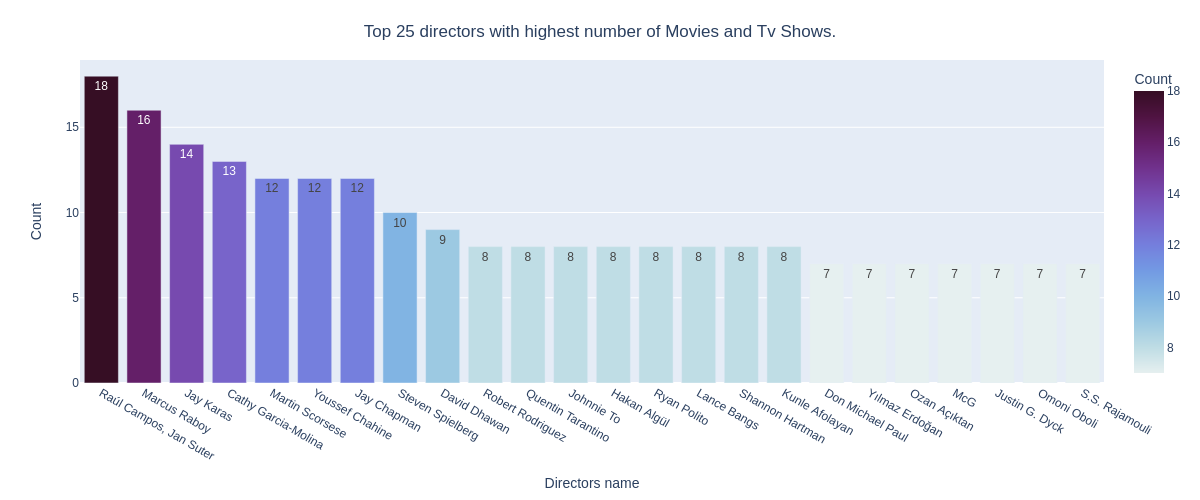

In [ ]:
#Plot of directors
directors_list = df.director.value_counts().reset_index().head(25)[1:]  # We will not include the null values.
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True, color='Count', color_continuous_scale= 'dense')

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(title={'text': 'Top 25 directors with highest number of Movies and Tv Shows.','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},autosize=False,width=1200,height=500)

fig.show('png')

**Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors having most numbers of movies and TV shows.**

## Top 10 Actors

In [ ]:
# List of all the actors in the dataset
def data2list(data):
# dict to store the count for each actor
  actor_list = {} 
# list to store all the names
  temp_list = []
# define the data we intend to use  
  cast_list = list(data['cast'])  
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [ ]:
# Dataframe for list of actors.
actor_list = pd.DataFrame([data2list(df)]).T.reset_index()
# dropped the null value in the dataframe which was present at 106th index.
actor_list = actor_list.sort_values(0, ascending=False).drop(106) 

In [ ]:
actor_list.head(10)

index   0
1294        Anupam Kher  38
194    Takahiro Sakurai  28
2203            Om Puri  27
4039     Shah Rukh Khan  27
740         Boman Irani  25
2506       Paresh Rawal  24
8462      Andrea Libman  24
4368          Yuki Kaji  23
4994       Vincent Tong  22
2201       Akshay Kumar  22

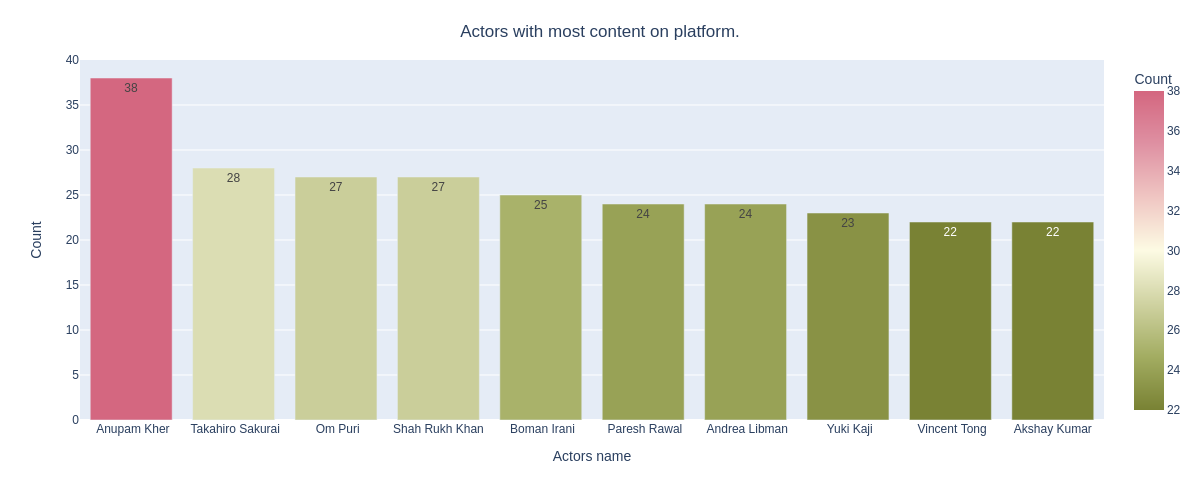

In [ ]:
# Plot of top actors
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale='armyrose')

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

**Anupam Kher is the one who appeared in most of the movies and TV Shows**. 

**Also, its good to see that 6 of the actors in the top ten list of most numbers tv shows and movies are from India.**

## **2**. **Understanding what type content is available in different countries**

## Content available in different countries 

In [ ]:
# Top 10 countries that produce most of the content
df['country_single'] = df['country'].apply(lambda x: x.split(",")[0])
country_order = df['country_single'].value_counts()[:10].index
countryVScontent = df[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type           index   Movie  TV Show
0      United States  2326.0   1053.0
1              India   883.0     73.0
2     United Kingdom   341.0    235.0
3             Canada   175.0     84.0
4              Japan    75.0    160.0
5             France   137.0     59.0
6        South Korea    42.0    152.0
7              Spain   119.0     49.0
8             Mexico    79.0     44.0
9          Australia    56.0     50.0

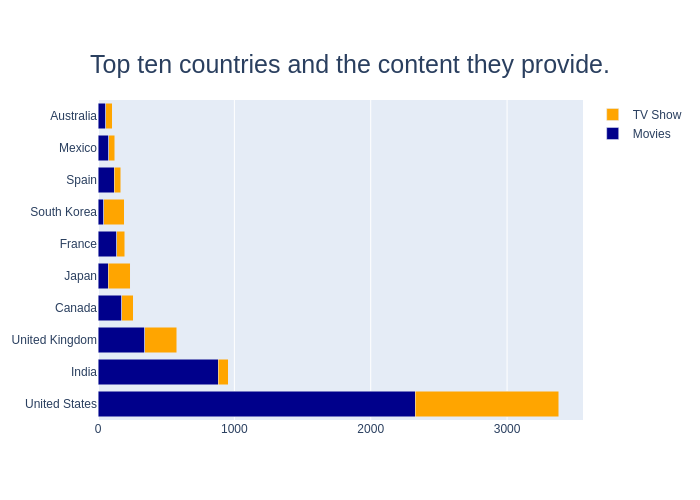

In [ ]:
# Plot of the Countries as per Movies and TV shows
fig = go.Figure()
fig.add_trace(go.Bar(y=countryVScontent['index'], x=countryVScontent['Movie'], name='Movies', orientation='h', marker=dict(color='darkblue')))
fig.add_trace(go.Bar(y=countryVScontent['index'], x=countryVScontent['TV Show'], name='TV Show', orientation='h', marker=dict(color='orange')))

fig.update_layout(barmode='stack', title={'text': 'Top ten countries and the content they provide.', 'y':0.89, 'x':0.5, 'font_size':25, 'xanchor': 'center', 'yanchor': 'top'})

fig.show('png')

**The United States is a leading producer of both types of content which is obvious as Netflix is US Based company.** 

**It is followed by India where most of the content is in the form of movies.**


##Content produced in top 10 countries

In [ ]:
# Make a copy of required features
a = df[df['country'] != 'unknown country'].loc[:,['show_id','title','country','listed_in','Genres']].copy()

In [ ]:
#Function to convert string type to list 
def operation(row,string):
  return row[string].split(', ')
a['listed_in'] = a.apply(lambda x: operation(x,'listed_in'), axis = 1)
a['country'] = a.apply(lambda x: operation(x,'country'), axis = 1)

In [ ]:
#Explodes the list of categories and genres in each row to individual rows
a = a.explode('Genres').explode('country')

In [ ]:
#Table containing number of videos belonging to each genre from different countries
a = a.groupby(['country','Genres']).agg({'show_id':'count'}).reset_index() #table contains number of videos belonging to each genre from different countries

In [ ]:
#Top 15 genre
top15genres = group.head(15)['Genres'].to_list()

In [ ]:
#Function to return the indices that contain the top10 countries with the top 10 genres viewed
def selectindex(row, attribute, list):
  b = row[attribute]
  boolean = b in list
  return boolean

index = a.apply(lambda x: selectindex(x, 'country',top10countries), axis = 1)
newindex = a[index].apply(lambda x: selectindex(x, 'Genres',top15genres), axis = 1)

In [ ]:
#Data containing number of videos in top 15 genres in top 10 countries
newdata = a[index][newindex] #data that contains the number videos in the top 15 genres in the top 10 countries

In [ ]:
#Defining color palette
gyr = ['#ff00ff','#00bfff',
 '#7f0000','#483d8b','#f0e68c','#b03060','#ff7f50','#00ff00',
 '#ee82ee','#00ffff','#1e90ff','#9acd32','#00fa9a','#ffb6c1',
 '#8b008b','#b8860b','#00008b','#ffd700','#008000','#008b8b','#e0ffff',
 '#000000','#ff0000','#0000ff','#556b2f']

Text(0, 0.5, 'NUMBER OF SHOWS & MOVIES')

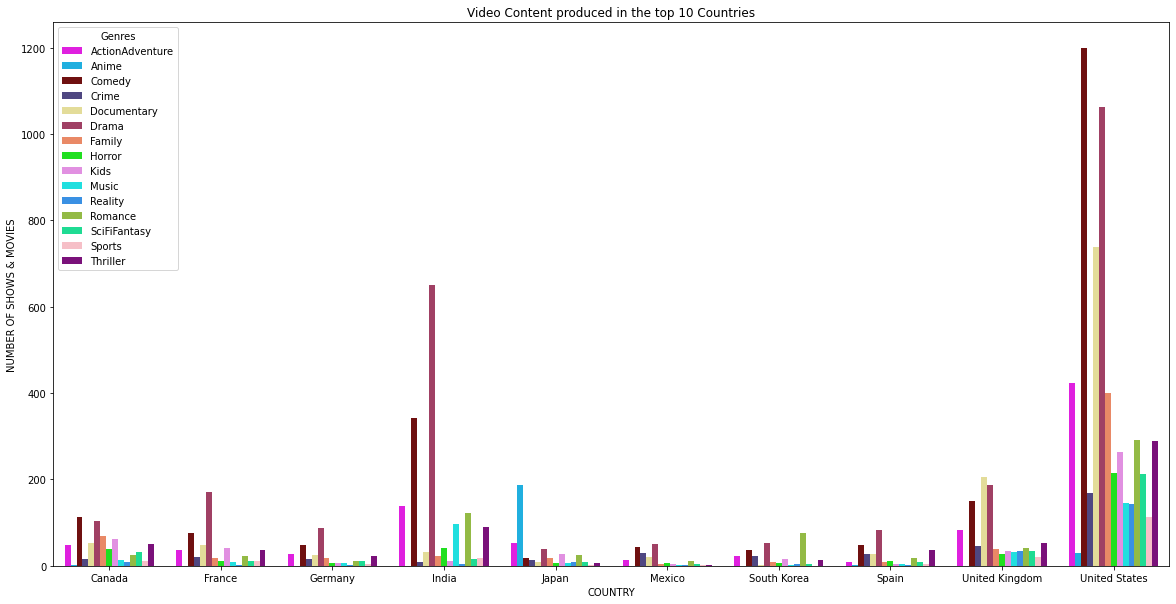

In [ ]:
# Required plot
a = plt.figure(figsize=(20,10))
sns.barplot(x = newdata['country'], y = newdata['show_id'], hue = newdata['Genres'], palette= sns.color_palette(gyr[:23]) )
plt.title('Video Content produced in the top 10 Countries')
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF SHOWS & MOVIES')

*  **Drama is the most produced genre in a lot of Non-English speaking countries**
*   **Comedy is the most produced genre in English speaking countries like United States of America and United Kingdom and Canada**


*  **Japan is the biggest producer of Anime. Anime is also the most produced in genre in Japan**
*  **Most South Korean content are from the Romance genre**


*   **Documentaries are mainly produced in United Kingdom and United States of America**
*   **Drama and Comedy are the most produced genres in the top countries with exceptions of Japan and South Korea**







##**3**. **Is Netflix has increasingly focusing on TV rather than movies in recent years**.

In [ ]:
# Make a copy of required features
content = df.loc[:,['title','date_added','release_year', 'duration', 'type']].dropna().copy()

In [ ]:
#Extracting year
content['date_added'] = content['date_added'].dt.year

In [ ]:
#Assuming TV shows release new seasons every year, adding a duplicate of the show for each season.
def season(row):
  release = row['release_year']
  added = row['date_added']

  if row['type'] =='TV Show':
    seasons = int(row['duration'][0])
    b = []
    for i in range(1, seasons+1):
      if i ==1:
        b.append(release)
      else:
        b.append(b[-1]-1)
    a = b
  else:
    a = []
    a.append(row['release_year'])      
  
  return a

content['Released Years'] = content.apply(lambda x: season(x),axis=1)

In [ ]:
#Exploding realease year
compare = content.explode('Released Years')

In [ ]:
#Movie and TV type
tv = compare[compare['type'] == 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [ ]:
#Concating both Movie and TV
data = pd.concat([tv, movie], axis = 0)

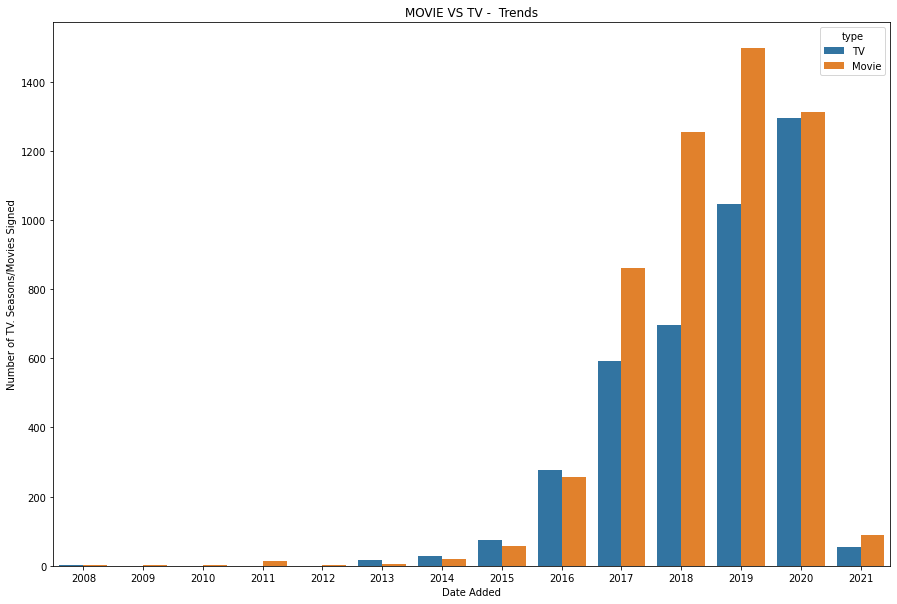

In [ ]:
# Required Plot
plt.figure(figsize = (15,10))
sns.barplot(x = 'date_added', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Date Added')
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')

**We can observe that TV shows signed have been higher than movies in 2016.** 

**While the no of movies signed were higher, it can be seen that the TV shows signed per year is catching up with the movies signed year by year.**

##**Data Preprocessing**

##**COMBINING Top CAST, DIRECTOR and ListedIn into single text attributes**

In [ ]:
#Combining different features into single text attribute
def combine(row):
  text = ' '.join(row['Genres']).lower()
  if row['cast'] != 'unknown':
    cast_list = [actor.replace(' ', '') for actor in row['cast'].split(', ')]
    if len(cast_list) < 5:
      text = text + ' ' + ' '.join(cast_list[:]).lower()
    else :
      text = text + ' ' + ' '.join(cast_list[:5]).lower()
  if row['director'] !='unknown':
    director_list = ' '.join([director.replace(' ', '') for director in row['director'].split(', ')])
    text = text + ' ' + director_list.lower()

  return text
df['Movie Deets'] = df.apply(lambda row: combine(row), axis = 1)


In [ ]:
#List of Movies Deets
df.head()['Movie Deets'].to_list()

['drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira ',
 'drama demiánbichir héctorbonilla oscarserrano azaliaortiz octaviomichel jorgemichelgrau',
 'horror teddchan stellachung henleyhii lawrencekoh tommykuan gilbertchan',
 'actionadventure scififantasy elijahwood johnc.reilly jenniferconnelly christopherplummer crispinglover shaneacker',
 'drama jimsturgess kevinspacey katebosworth aaronyoo lizalapira robertluketic']

In [ ]:
# Important packages for data cleaning 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

##WORD TOKENIZATION

In [ ]:
#Tokenization
import string
def tokenizer(txt):  
  tokens = word_tokenize(txt) 
  
  return tokens
df['Processed Description'] = df['description'].apply(tokenizer)
df['Processed Movie Deets'] = df['Movie Deets'].apply(tokenizer)

##PUNCTUATION REMOVAL

In [ ]:
#Dealing with Punctuation
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
  tokens = text
  new_tok = []
  for i in tokens:
    word = i
    for punctuation in list(string.punctuation):
      word = word.replace(punctuation, ' ')
    if word.replace(' ','').isalnum():
      new_tok.append(word)

  return ' '.join(new_tok).split(' ')

df['Processed Description'] = df['Processed Description'].apply(lambda x : remove_punctuation(x, regular_punct))
df['Processed Movie Deets'] = df['Processed Movie Deets'].apply(lambda x : remove_punctuation(x, regular_punct))



##STOPWORDS REMOVAL

In [ ]:
#Removing Stopwords
stop_words = set(stopwords.words('english')) 

def remove_stop(tokens, stopwords):
  return [t.lower() for t in tokens if t.lower() not in stopwords]


df['Processed Description'] = df['Processed Description'].apply(lambda x : remove_stop(x, stop_words))

a = df.copy() #will be used for wordcloud later on

##STEMMING

In [ ]:
#Extracting rootwords
ps = PorterStemmer()

def stem_text(text):  
  stemmed = []
  for word in text:
    stemmed.append(ps.stem(word))
  return stemmed


df['Processed Description'] = df['Processed Description'] .apply(lambda x : stem_text(x)) 

In [ ]:
# Appending
def joiner(text_list):
  new = []
  for text in text_list:
    if text == ' ' or text == '' :
      pass
    else:
      new.append(text)
      
  return ' '.join(new)

df['Processed Description'] = df['Processed Description'] .apply(lambda x : joiner(x))
df['Processed Movie Deets'] = df['Processed Movie Deets'].apply(lambda x : joiner(x))

In [ ]:
# Looking description, Processed Description, Movie Deets, Processed Movie Deets
df.loc[:,['description','Processed Description','Movie Deets',	'Processed Movie Deets']].head(1).T

0
description            In a future where the elite inhabit an island ...
Processed Description  futur elit inhabit island paradis far crowd sl...
Movie Deets            drama scififantasy joãomiguel biancacomparato ...
Processed Movie Deets  drama scififantasy joãomiguel biancacomparato ...

In [ ]:
# Processed descrioption df
df['Processed Description']

0       futur elit inhabit island paradis far crowd sl...
1       devast earthquak hit mexico citi trap survivor...
2       armi recruit found dead fellow soldier forc co...
3       postapocalypt world rag doll robot hide fear d...
4       brilliant group student becom card count exper...
                              ...                        
7782    lebanon civil war depriv zozo famili left grie...
7783    scrappi poor boy worm way tycoon dysfunct fami...
7784    documentari south african rapper nasti c hit s...
7785    dessert wizard adriano zumbo look next willi w...
7786    documentari delv mystiqu behind blue rock trio...
Name: Processed Description, Length: 7770, dtype: object

##Text Vectorization

In [ ]:
#Converting word to vector
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
#shape of description vector
count_vectorizer = CountVectorizer(min_df = 10,max_df=0.5)
count_description_vector = count_vectorizer.fit_transform(df['Processed Description'])

count_movie_vector = count_vectorizer.fit_transform(df['Processed Movie Deets'])

In [ ]:
#shape of description vector
count_description_vector.shape

(7770, 2121)

In [ ]:
#shape of movie vector
count_movie_vector.shape

(7770, 192)

##Dimensionality reduction using PCA

In [ ]:
#Intializaling and fitting PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pd.concat([pd.DataFrame(count_description_vector.todense()), pd.DataFrame(count_movie_vector.todense())],axis =1))

PCA()

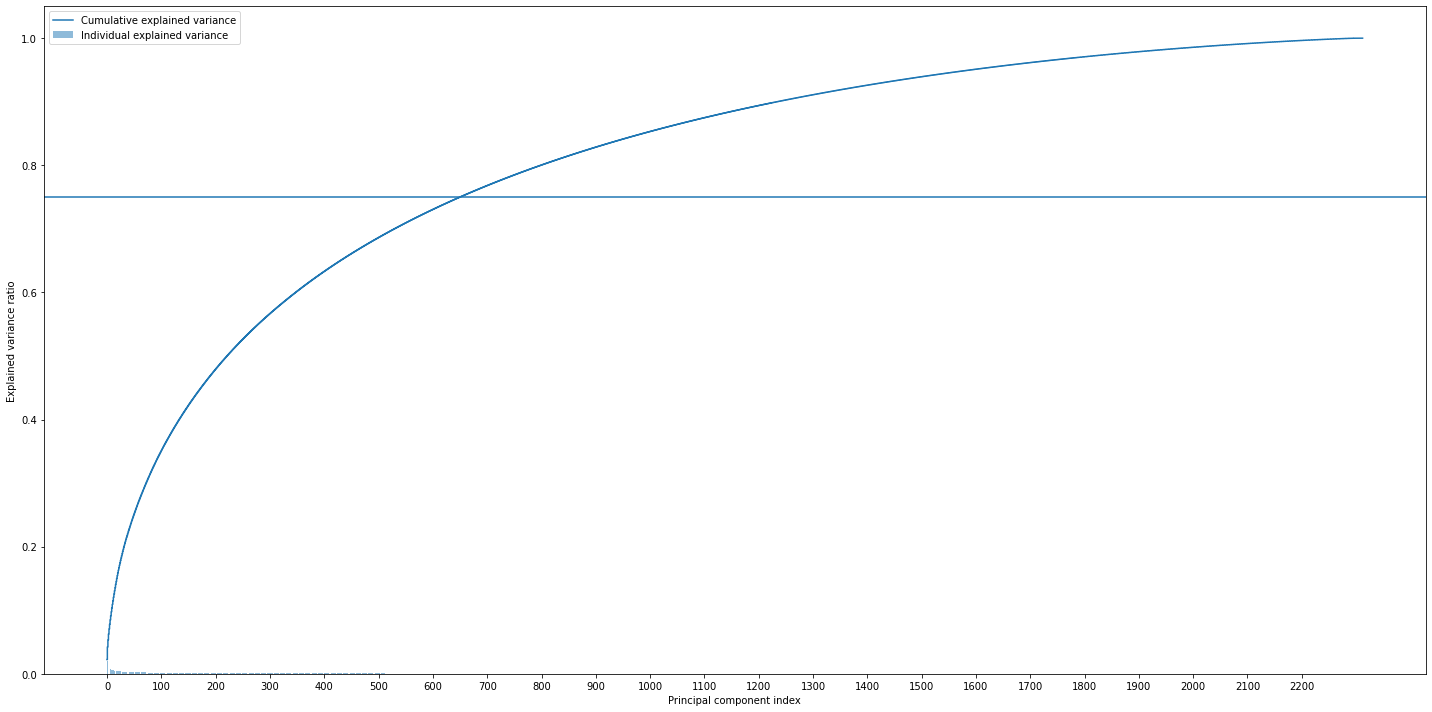

In [ ]:
# Scree Plot of PCA
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize = (20,10))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xticks(ticks = np.arange(0,2300,100))
plt.axhline(y=0.75)
plt.show()

Vectorising the preprocessed attributes Movie Deets and Description has sum total of 2121 + 192 = 2313 dimensions. These dimensions will have to be reduced using PCA, which would result in loss of information. Alternatively, the two attributes can be used to model the content into topics using Latent Dirichlet Allocation. This would makes sure that all the topical information about video content are captured without putting any available information to waste.

##BAG OF WORDS WORDCLOUD GENERATION of CONTENT DESCRIPTION BASED ON GENRE

In [ ]:
from wordcloud import WordCloud

In [ ]:
#Exploding genre
genres = df.explode('Genres').Genres.unique()

In [ ]:
#Making a copy of genre
copy =  a.explode('Genres').copy()
a = copy.copy()
a['Processed Description'] = a['Processed Description'] .apply(lambda x : joiner(x))

<Figure size 2520x2160 with 0 Axes>

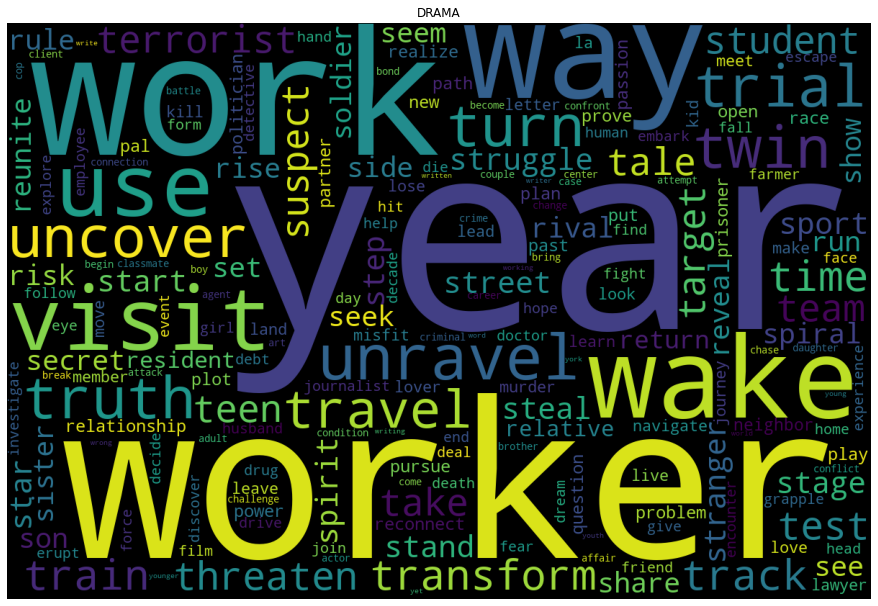

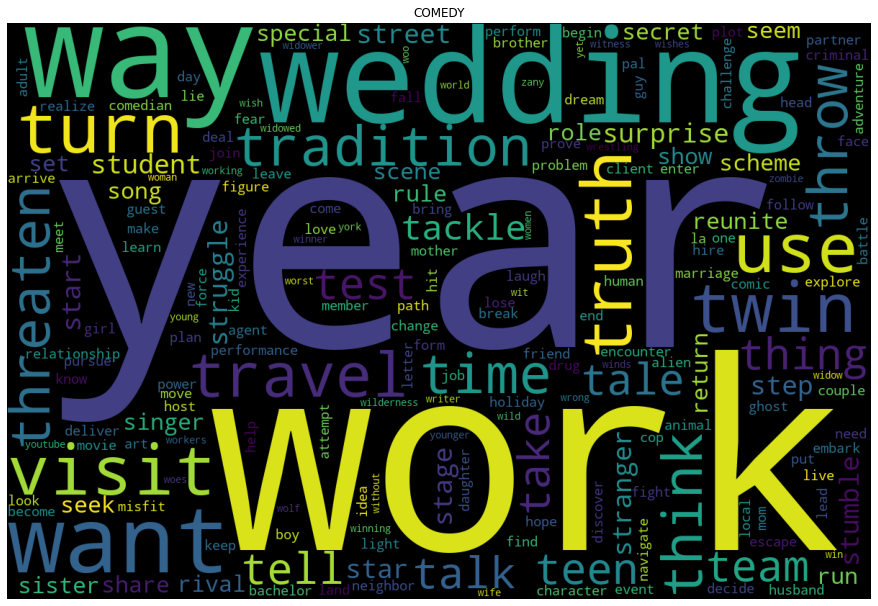

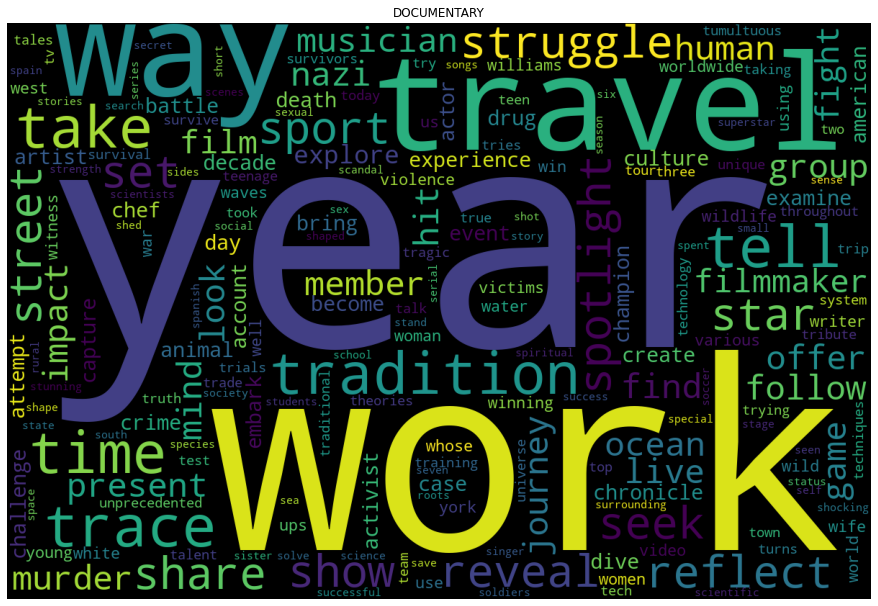

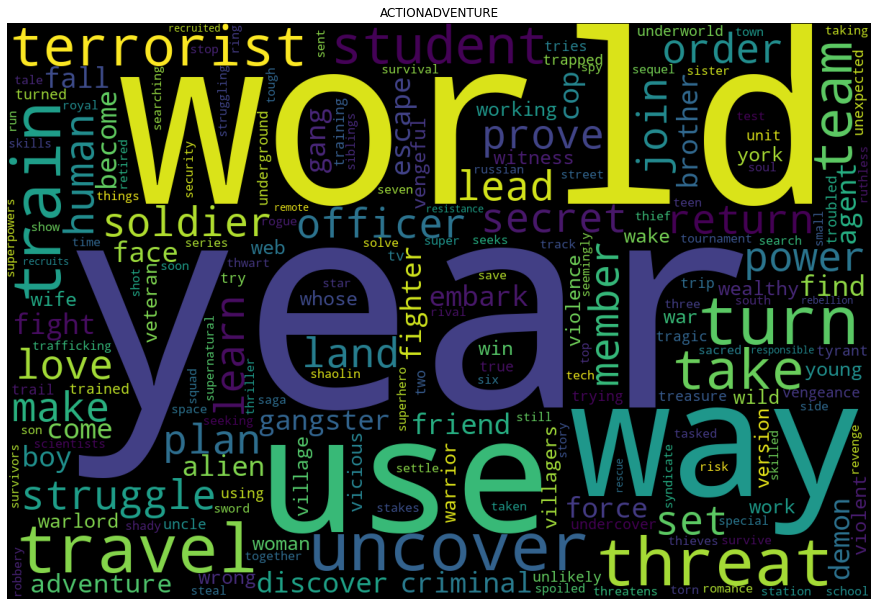

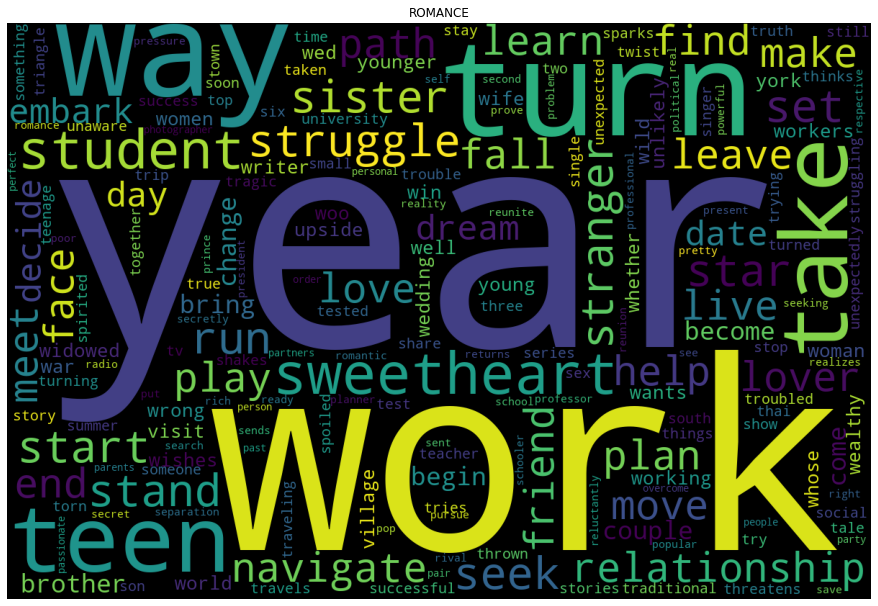

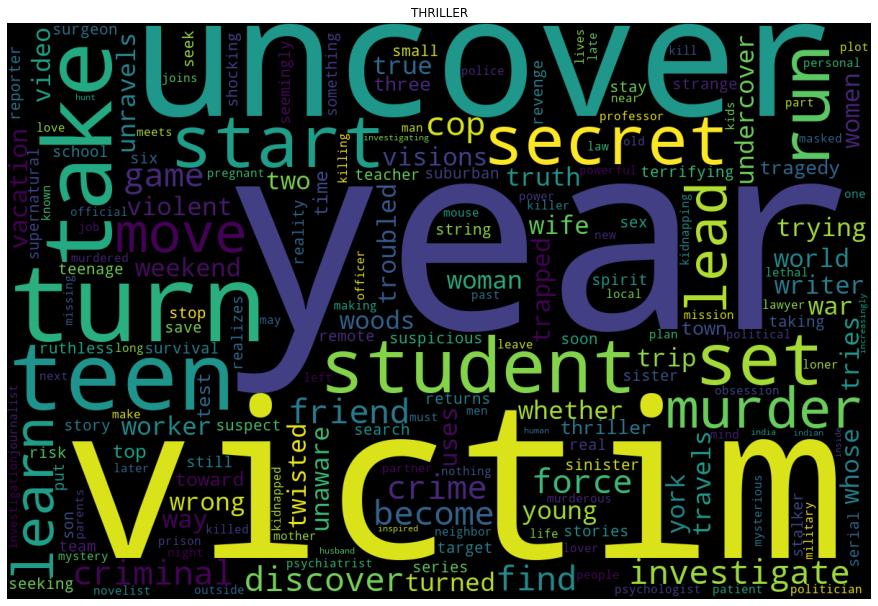

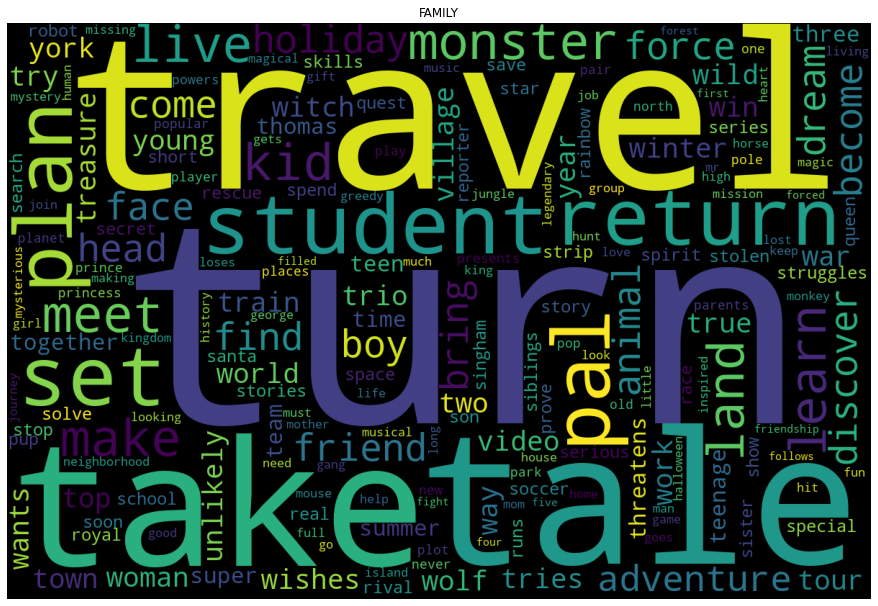

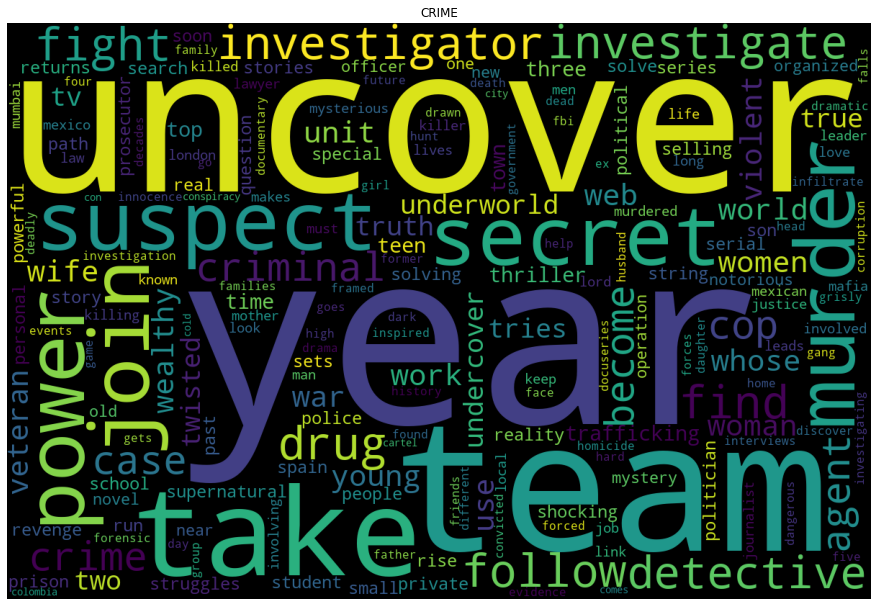

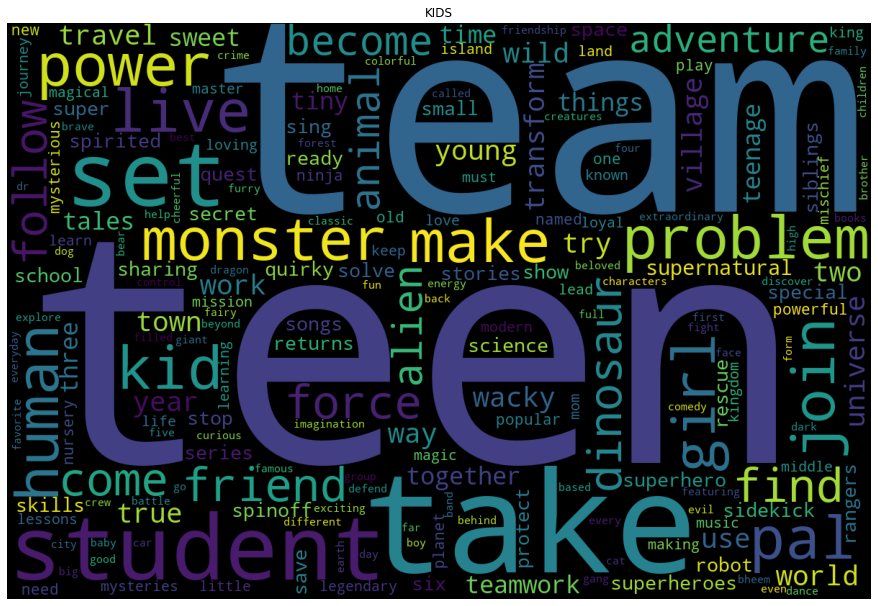

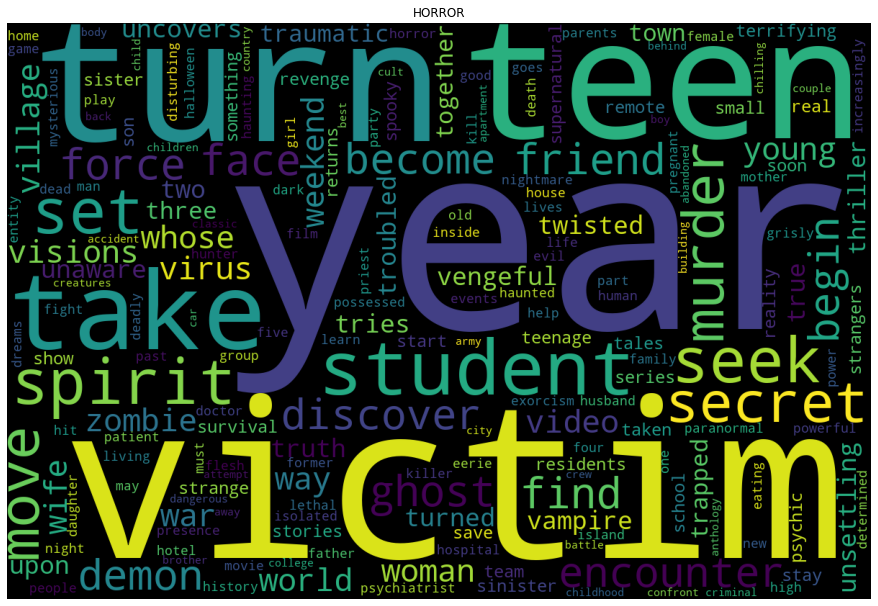

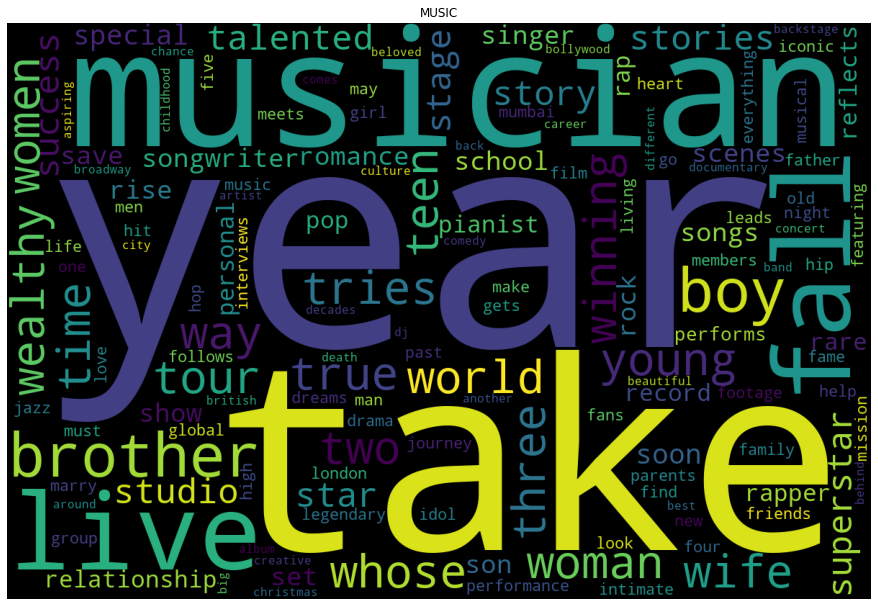

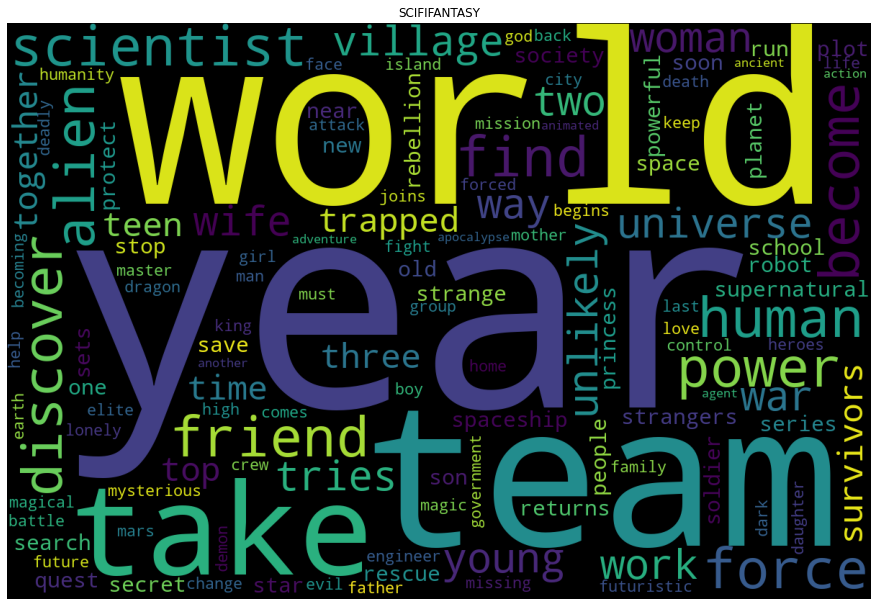

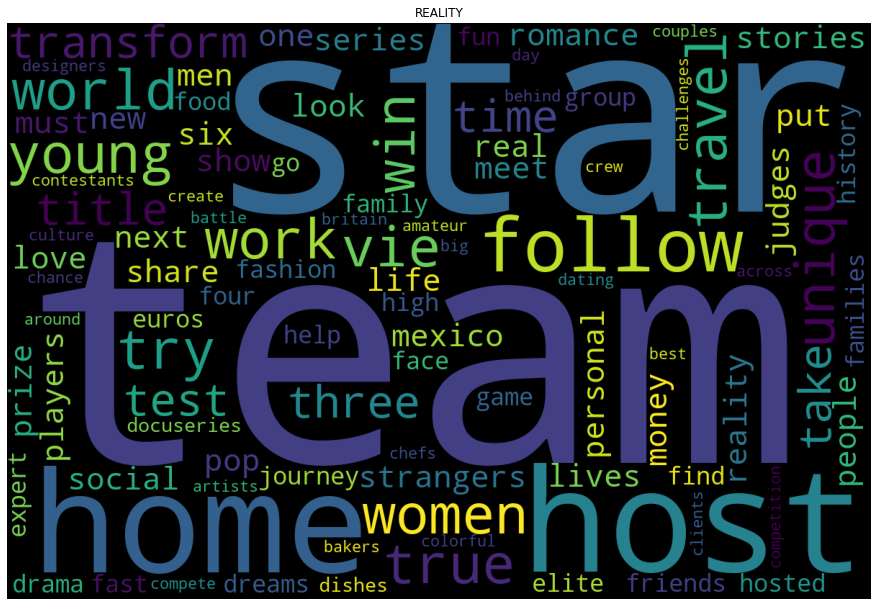

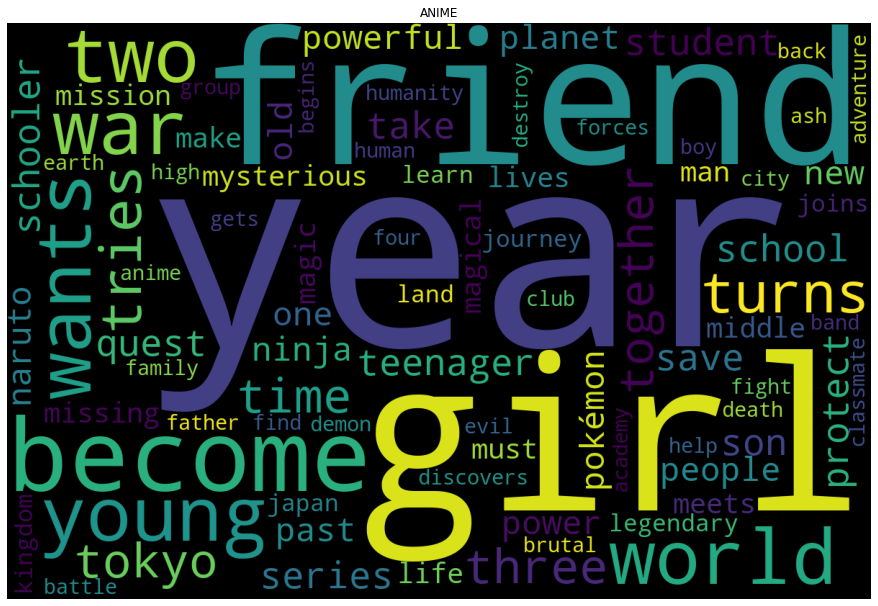

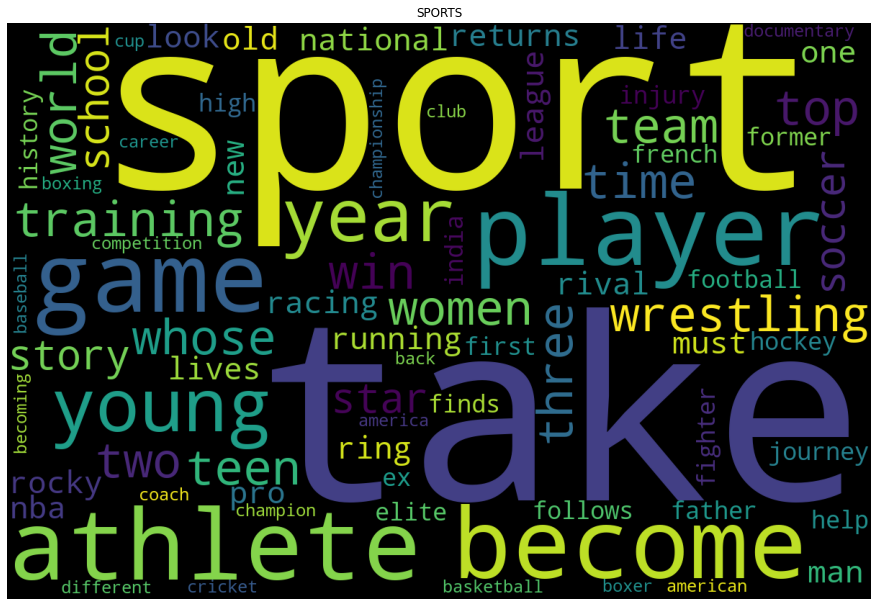

In [ ]:
#Word cloud for different genre
plt.figure(figsize=(35, 30))
plt.suptitle("Word Cloud for Different Genres", fontsize=18, y=0.5)

for genre in top15genres:
  if genre != '':
    
    count_description_vectorizer = CountVectorizer(ngram_range = (1,1), min_df = 5, max_df = 0.7)
    # fit the count vectorizer using the text data
    count_description_vectorizer.fit(a[a.Genres == genre]['Processed Description'])
    dictionary = count_description_vectorizer.vocabulary_.items()

    vocab = []
    count_of_vocab = []
    # Iterate through each vocab and count append the value to designated lists
    for key, value in dictionary:
        vocab.append(key)
        count_of_vocab.append(value)

    count_description_df = pd.DataFrame({'Token':vocab, 'Count':np.array(count_of_vocab)}).sort_values('Count', ascending= False)
    comment_words = ' '.join(count_description_df['Token'].to_list())
    
    wordcloud = WordCloud(width = 1200, height = 800,
                    background_color ='black',
                    min_font_size = 10, random_state = 33).generate(comment_words)
                    # plot the WordCloud image 
    plt.figure(figsize = (12, 8), facecolor = None)                     
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(genre.upper())
    
    plt.show()

##Preparing dataset for clustering

In [ ]:
#Making df required for clustering analysis
clustering_df = df[['type', 'duration','rating','release_year']]

Encoding TV and Movie ratings into one based on their age reccomendations

In [ ]:
# Function to define rating as per the description
def topick(row):
  older_kids = ['TV-PG', 'PG', 'TV-Y7', 'TV-Y7-FV']
  kids = ['TV-G', 'G', 'TV-Y']
  teens = ['PG-13','TV-14']
  adult = ['R', 'NC-17', 'TV-MA', 'UR', 'NR']

  rating = 'Others'
  for column in older_kids + kids + teens + adult:
    if row[column] == 1:
      if column in older_kids:
        rating = 'Older Kids'
      elif column in kids :
        rating = 'Kids'
      elif column in teens :
        rating = 'Teens'
      elif column in adult:
        rating = 'Adult'
      
  return rating

ratings = pd.get_dummies(clustering_df['rating']).apply(lambda x: topick(x),axis=1)

##ENCODING TYPE, RATING

In [ ]:
#Encoding df
clustering_df = pd.concat([clustering_df.drop(['type','rating'],axis =1),pd.get_dummies(ratings), pd.get_dummies(clustering_df['type'])], axis =1)

In [ ]:
# Looking data after encoding
clustering_df

duration  release_year  Adult  Kids  Older Kids  Teens  Movie  TV Show
0     4 Seasons          2020      1     0           0      0      0        1
1        93 min          2016      1     0           0      0      1        0
2        78 min          2011      1     0           0      0      1        0
3        80 min          2009      0     0           0      1      1        0
4       123 min          2008      0     0           0      1      1        0
...         ...           ...    ...   ...         ...    ...    ...      ...
7782     99 min          2005      1     0           0      0      1        0
7783    111 min          2015      0     0           0      1      1        0
7784     44 min          2019      1     0           0      0      1        0
7785   1 Season          2019      0     0           1      0      0        1
7786     90 min          2019      1     0           0      0      1        0

[7770 rows x 8 columns]

##PROCESSING MOVIE DURATION

Extracting season numbers and movie duration as separate columns

In [ ]:
# Function to extract movie and show duration seperately
def duration(row,column):
  text = row['duration'].split()
  if column == 'show':
    if row['Movie'] == 0:
      return int(text[0])
    else:
      return 0
  if column == 'movie':
    if row['Movie'] ==1:
      return int(text[0])
    else:
      return 0
clustering_df['show_duration'] = clustering_df.apply(lambda x: duration(x,'show'),axis =1)

clustering_df['movie_duration'] = clustering_df.apply(lambda x: duration(x,'movie'), axis=1)

In [ ]:
# Droping 'duration' column from clustering_df
clustering_df.drop('duration', axis = 1, inplace=True)

##Binning Release Years based on decades

In [ ]:
#Release_year array
(clustering_df['release_year']).unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
#Function to make bins out of release_year
def bin_release_year(row):
  r_year = row['release_year']
  for yr in np.arange(2030,1910,-10):
    if r_year >= yr:
      return (yr)

clustering_df['release_year_bins'] =(clustering_df.apply(lambda x: bin_release_year(x), axis=1))

In [ ]:
# looking clustering_df
clustering_df

release_year  Adult  Kids  Older Kids  Teens  Movie  TV Show  \
0             2020      1     0           0      0      0        1   
1             2016      1     0           0      0      1        0   
2             2011      1     0           0      0      1        0   
3             2009      0     0           0      1      1        0   
4             2008      0     0           0      1      1        0   
...            ...    ...   ...         ...    ...    ...      ...   
7782          2005      1     0           0      0      1        0   
7783          2015      0     0           0      1      1        0   
7784          2019      1     0           0      0      1        0   
7785          2019      0     0           1      0      0        1   
7786          2019      1     0           0      0      1        0   

      show_duration  movie_duration  release_year_bins  
0                 4               0               2020  
1                 0              93               2010  
2                 0              78               2010  
3                 0              80               2000  
4                 0             123               2000  
...             ...             ...                ...  
7782              0              99               2000  
7783              0             111               2010  
7784              0              44               2010  
7785              1               0               2010  
7786              0              90               2010  

[7770 rows x 10 columns]

##SCALING

In [ ]:
# Defining vectorizer_clustering
vectorizer_clustering = pd.concat([clustering_df.drop(['release_year'], axis=1),], axis =1)

In [ ]:
#Looking vectorizer_clustering
vectorizer_clustering

Adult  Kids  Older Kids  Teens  Movie  TV Show  show_duration  \
0         1     0           0      0      0        1              4   
1         1     0           0      0      1        0              0   
2         1     0           0      0      1        0              0   
3         0     0           0      1      1        0              0   
4         0     0           0      1      1        0              0   
...     ...   ...         ...    ...    ...      ...            ...   
7782      1     0           0      0      1        0              0   
7783      0     0           0      1      1        0              0   
7784      1     0           0      0      1        0              0   
7785      0     0           1      0      0        1              1   
7786      1     0           0      0      1        0              0   

      movie_duration  release_year_bins  
0                  0               2020  
1                 93               2010  
2                 78               2010  
3                 80               2000  
4                123               2000  
...              ...                ...  
7782              99               2000  
7783             111               2010  
7784              44               2010  
7785               0               2010  
7786              90               2010  

[7770 rows x 9 columns]

In [ ]:
#Normalizing the clustering data using MinMax Scaler
scaler = MinMaxScaler()
X_rescale = scaler.fit_transform(vectorizer_clustering)
#dataset contains degree of belonging of document to each topic concatenated to scaled Dataframe 
X = pd.concat([pd.DataFrame(X_rescale,columns = vectorizer_clustering.columns )],axis=1)

In [ ]:
X

Adult  Kids  Older Kids  Teens  Movie  TV Show  show_duration  \
0       1.0   0.0         0.0    0.0    0.0      1.0         0.2500   
1       1.0   0.0         0.0    0.0    1.0      0.0         0.0000   
2       1.0   0.0         0.0    0.0    1.0      0.0         0.0000   
3       0.0   0.0         0.0    1.0    1.0      0.0         0.0000   
4       0.0   0.0         0.0    1.0    1.0      0.0         0.0000   
...     ...   ...         ...    ...    ...      ...            ...   
7765    1.0   0.0         0.0    0.0    1.0      0.0         0.0000   
7766    0.0   0.0         0.0    1.0    1.0      0.0         0.0000   
7767    1.0   0.0         0.0    0.0    1.0      0.0         0.0000   
7768    0.0   0.0         1.0    0.0    0.0      1.0         0.0625   
7769    1.0   0.0         0.0    0.0    1.0      0.0         0.0000   

      movie_duration  release_year_bins  
0           0.000000                1.0  
1           0.298077                0.9  
2           0.250000                0.9  
3           0.256410                0.8  
4           0.394231                0.8  
...              ...                ...  
7765        0.317308                0.8  
7766        0.355769                0.9  
7767        0.141026                0.9  
7768        0.000000                0.9  
7769        0.288462                0.9  

[7770 rows x 9 columns]

In [ ]:
X = X.to_numpy()

##CREATING DICTIONARY FOR REPORT

In [ ]:
#Dictionary to get report of clustering 
clustering_report = {
    'Algorithm':[],
    'Parameters':[],
    'Clusters':[],
    'Silhouette Coefficient':[]}

In [ ]:
#Fuction to create report
def update_report(algo_name, details,clusters, sil_score):
  data = [algo_name, details, clusters,sil_score]
  for i,detail in enumerate(clustering_report):
    clustering_report[detail].append(data[i])
  

##**KMeans Clustering**

## Optimum K value using Metric:Silhouette.

In [ ]:
# Silhuoette score for different clusters
silhouette_score_ = [ ]
sum_of_sq_dist = {}
range_n_clusters = [i for i in range(2,21)]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10,random_state=10)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    sum_of_sq_dist[n_clusters] = clusterer.inertia_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])

In [ ]:
#Defining dataframe for KMeans clustering
Kmeans = pd.DataFrame(silhouette_score_ , columns = ["No of Clusters" , "Silhouette Score"])

##Clusters vs Silhouette score

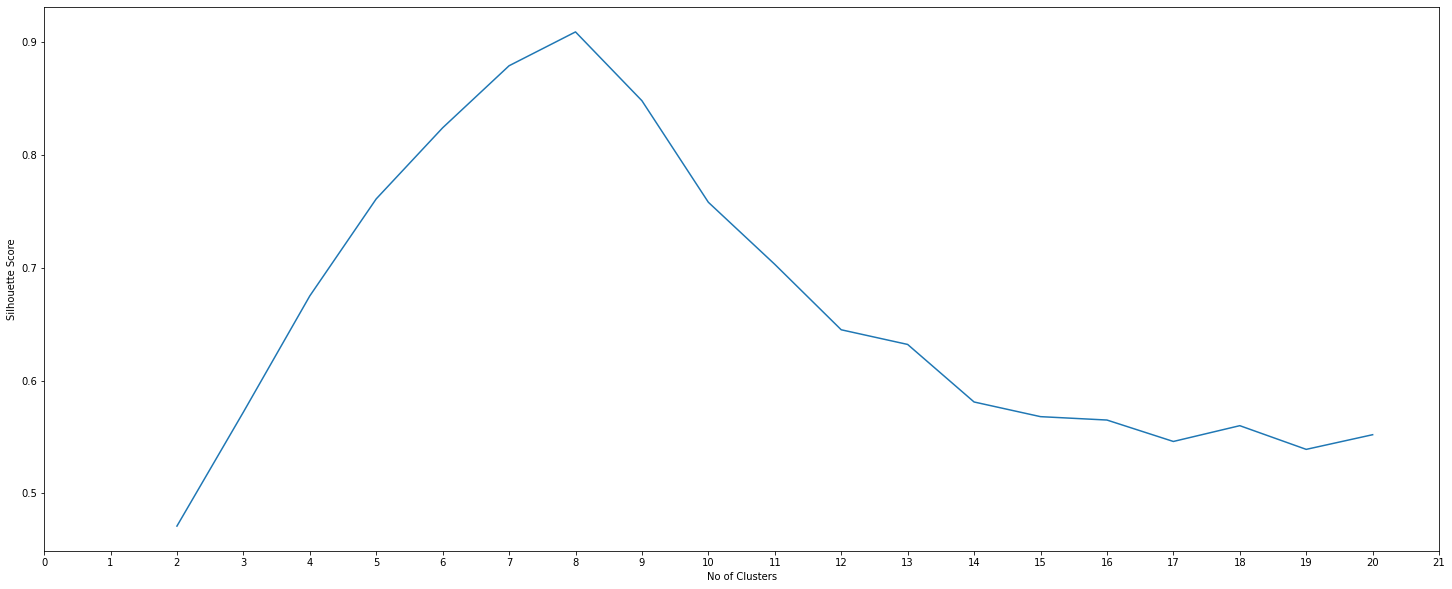

In [ ]:
#Silhouette vs clusters plot
plt.figure(figsize=(25,10))
_ = sns.lineplot(x = Kmeans['No of Clusters'], y = Kmeans['Silhouette Score'])
_ = plt.xticks(ticks = np.arange(0,22,1))

In [ ]:
#Clustering report
Kmeans.sort_values(['Silhouette Score','No of Clusters'],ascending=False).head()

No of Clusters  Silhouette Score
6               8             0.909
5               7             0.879
7               9             0.848
4               6             0.824
3               5             0.761

**The highest silhouette score is 0.909 produced with 8 Clusters using K Means Algorithm**


##Elbow method to find optimum k value:

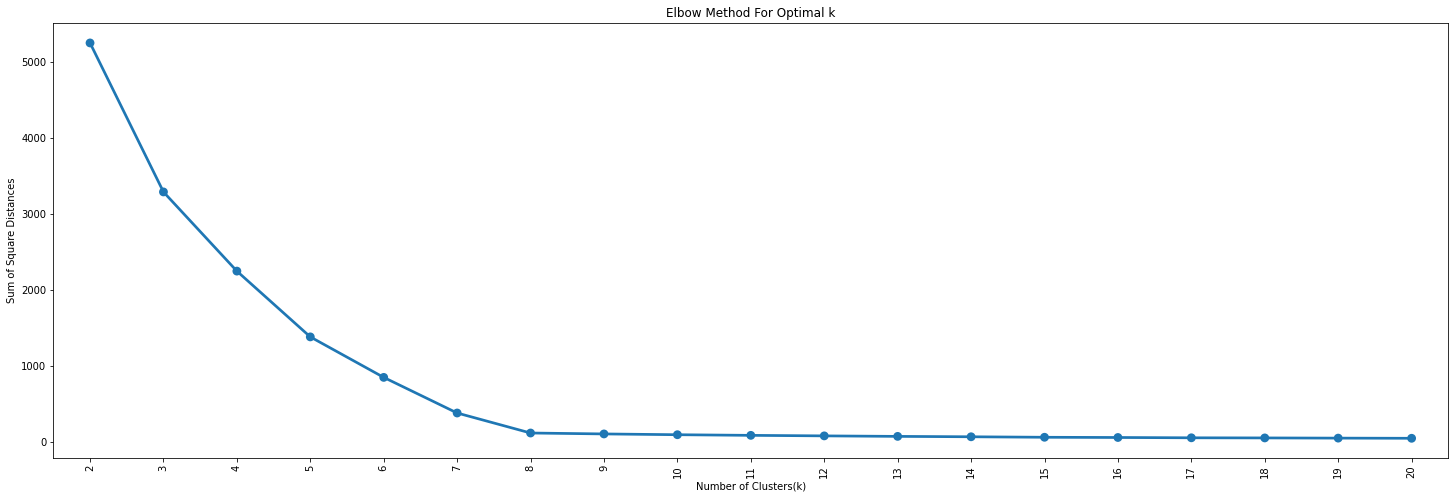

In [ ]:
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(25,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(rotation = 90)
plt.show()

##Displaying Silhouette plot for K means Clustering

##Clustering considering k=8


For n_clusters = 2 The average silhouette_score is : 0.47110149425332704
For n_clusters = 3 The average silhouette_score is : 0.5715618724972596
For n_clusters = 4 The average silhouette_score is : 0.6749183495985941
For n_clusters = 5 The average silhouette_score is : 0.761257992444187
For n_clusters = 6 The average silhouette_score is : 0.8241586215209683
For n_clusters = 7 The average silhouette_score is : 0.878767417891252
For n_clusters = 8 The average silhouette_score is : 0.9088984605920681
For n_clusters = 9 The average silhouette_score is : 0.847653554157447
For n_clusters = 10 The average silhouette_score is : 0.7575834743509814
For n_clusters = 11 The average silhouette_score is : 0.702871382837682
For n_clusters = 12 The average silhouette_score is : 0.6445708894336349
For n_clusters = 13 The average silhouette_score is : 0.6315671419551456
For n_clusters = 14 The average silhouette_score is : 0.5805753361288062
For n_clusters = 15 The average silhouette_score is : 0.568252

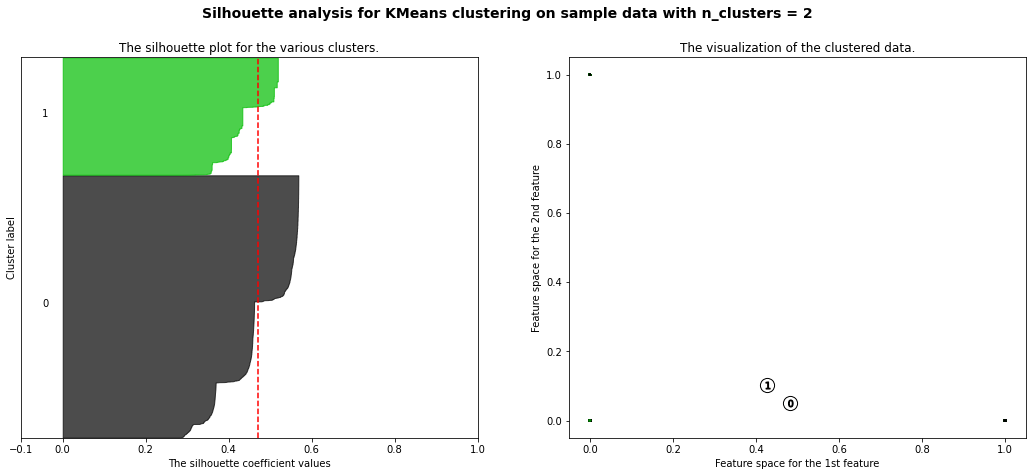

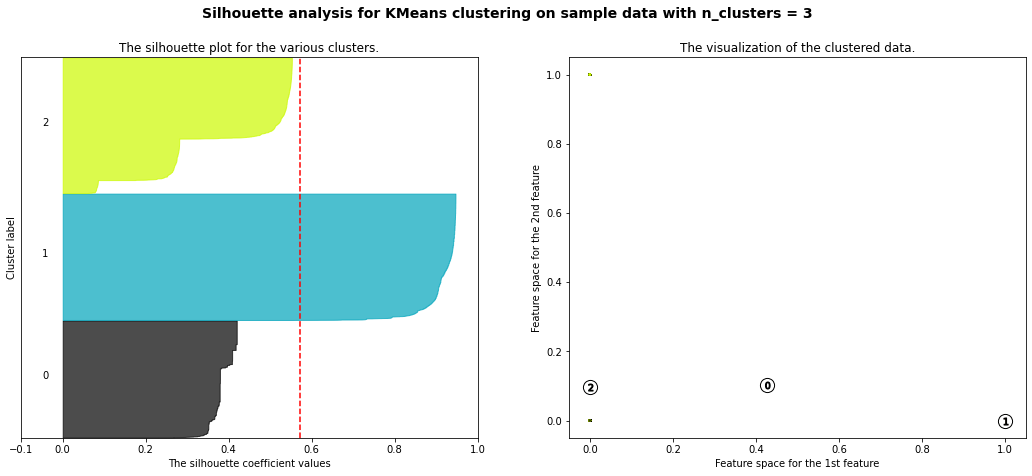

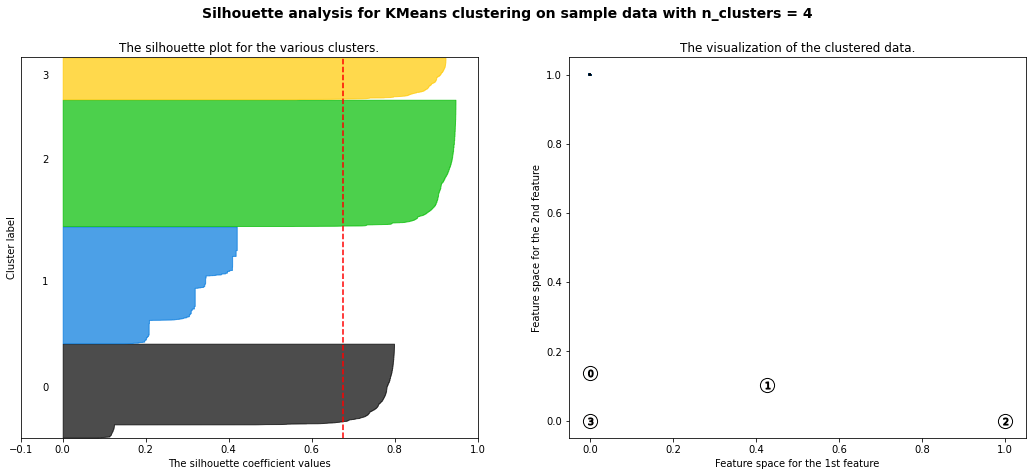

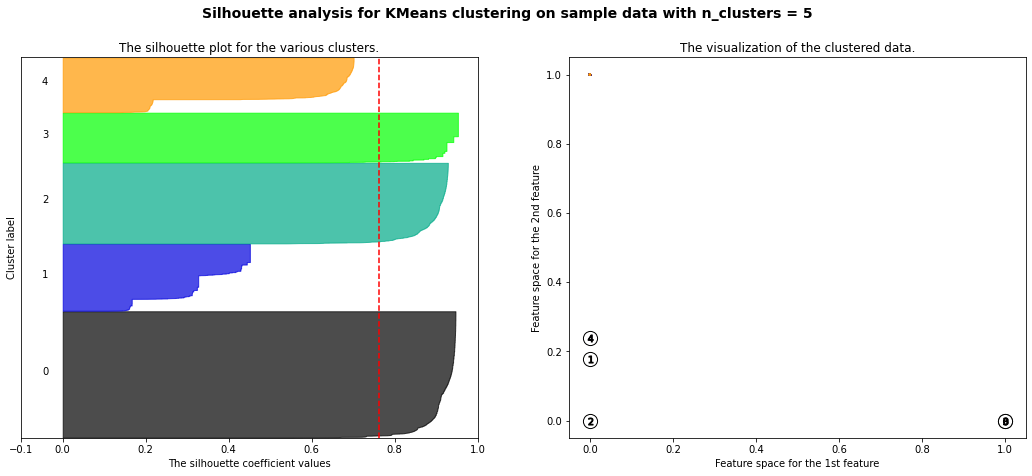

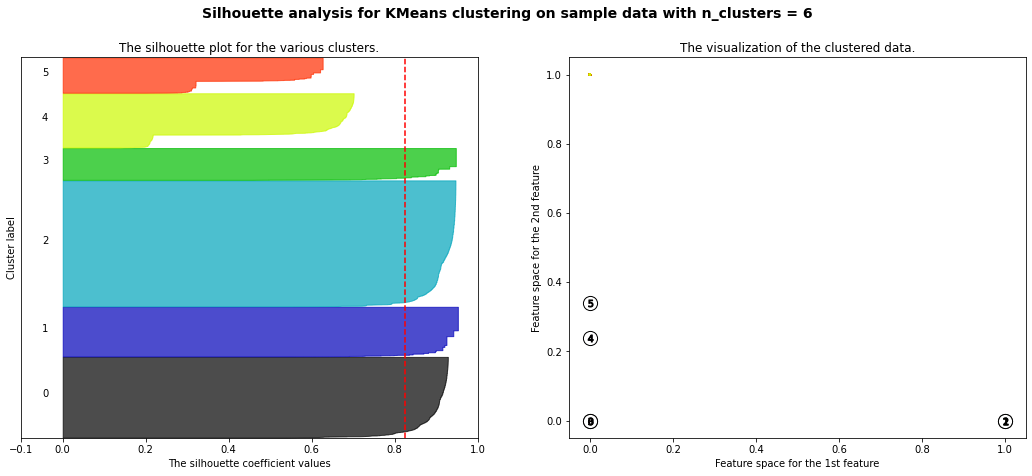

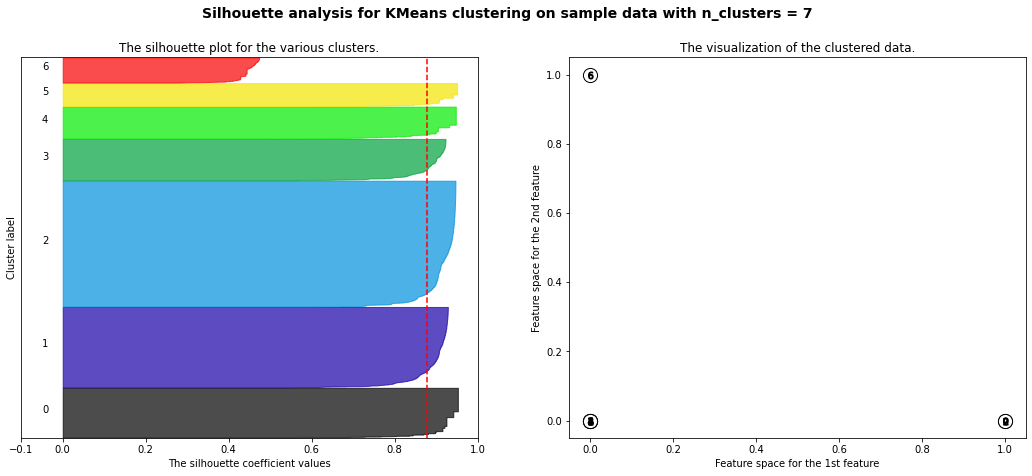

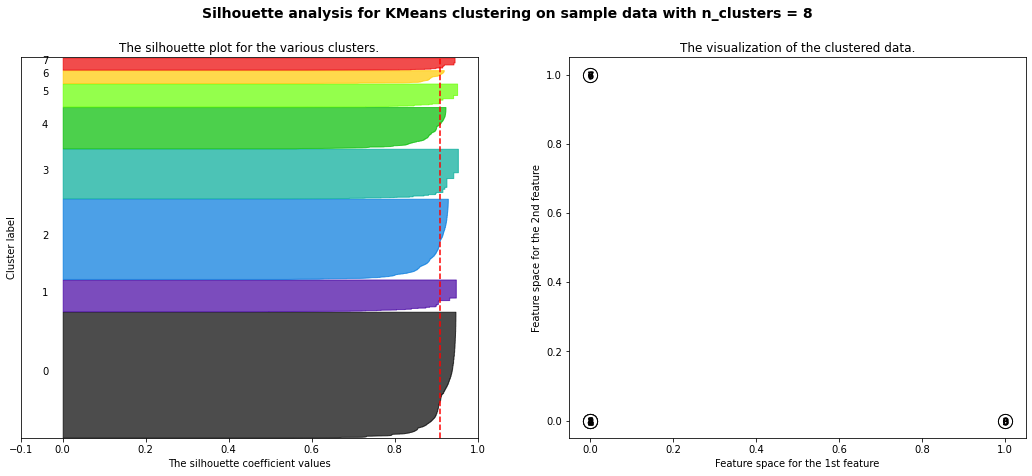

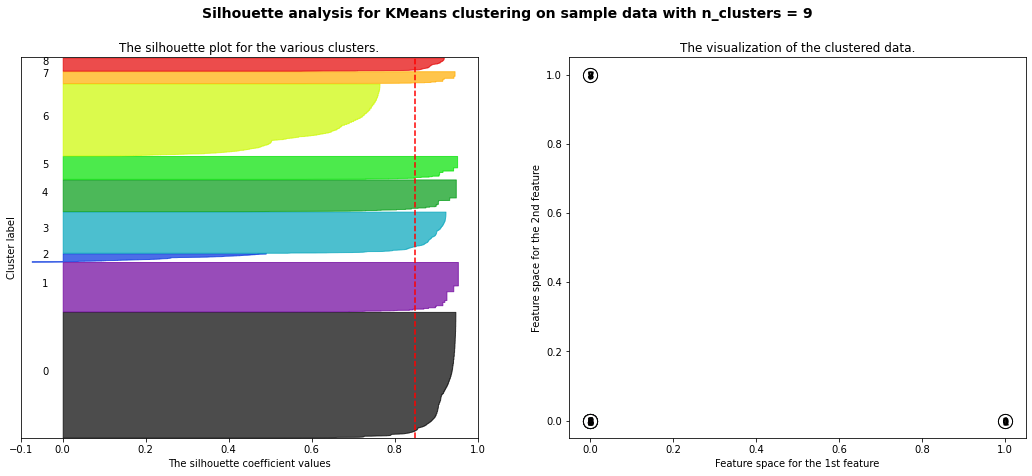

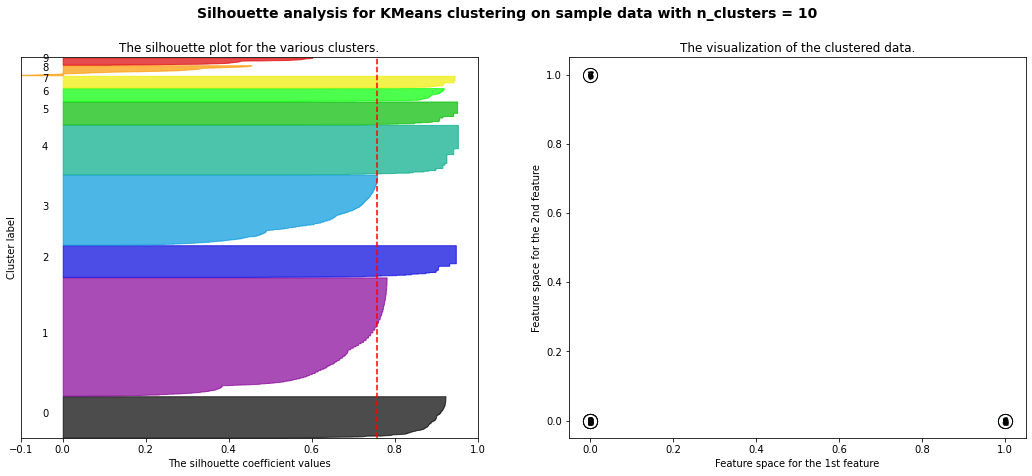

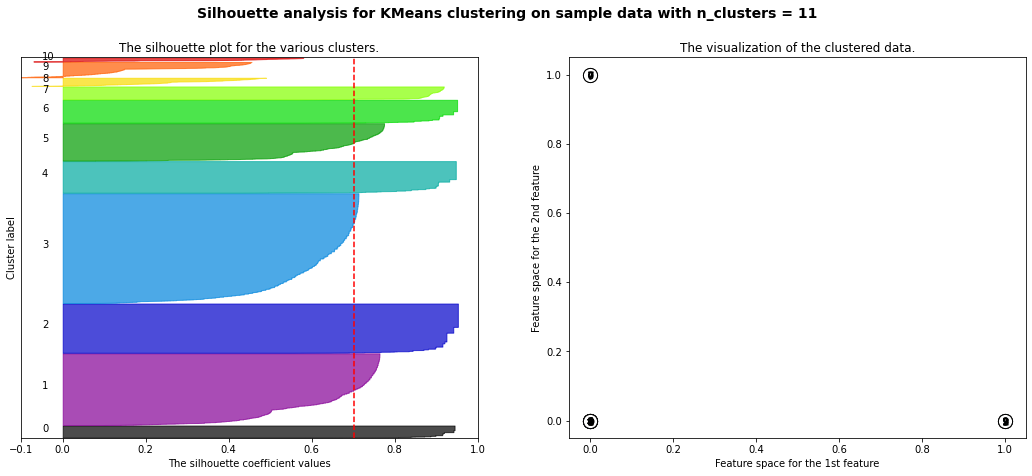

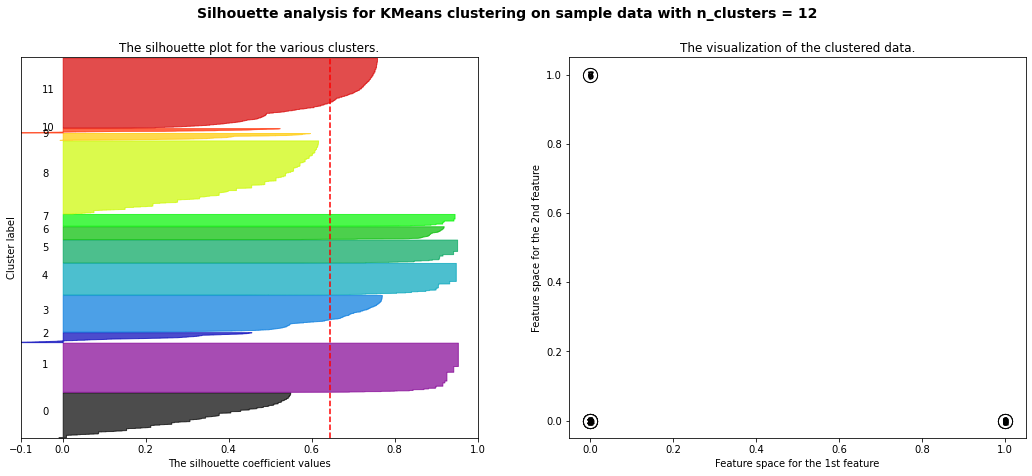

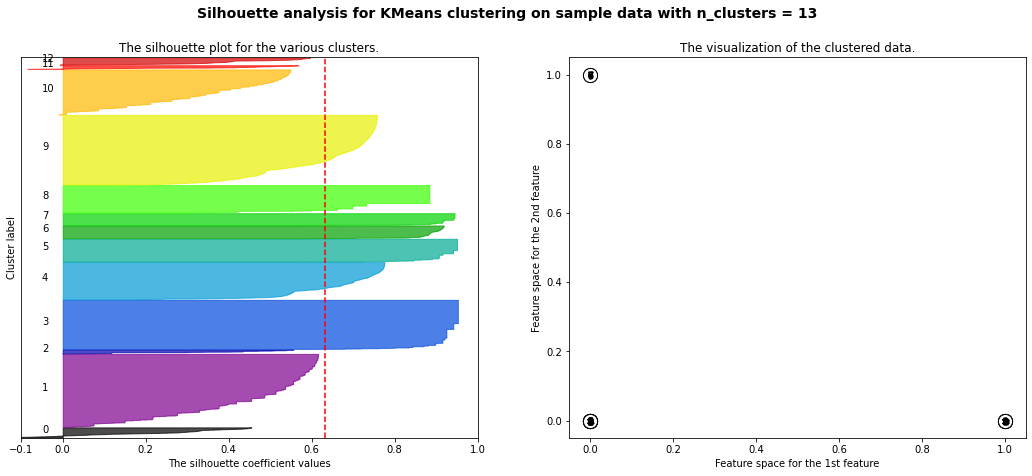

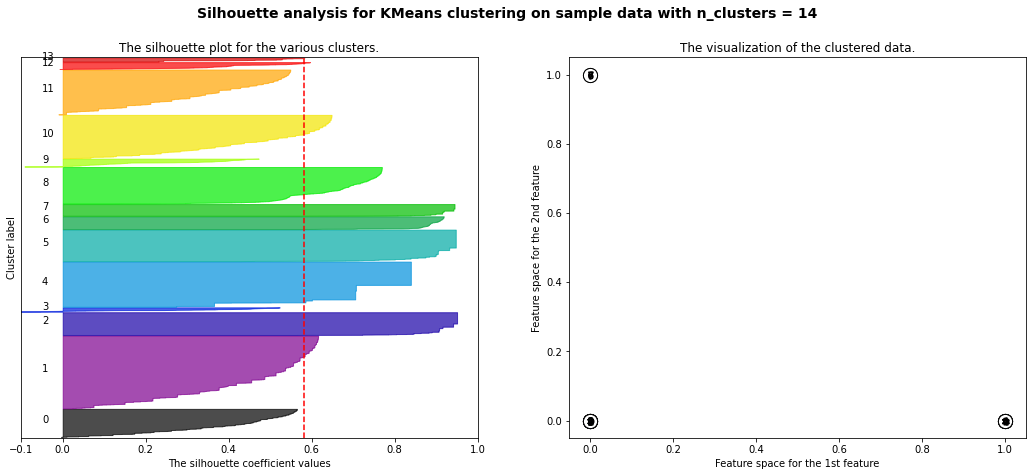

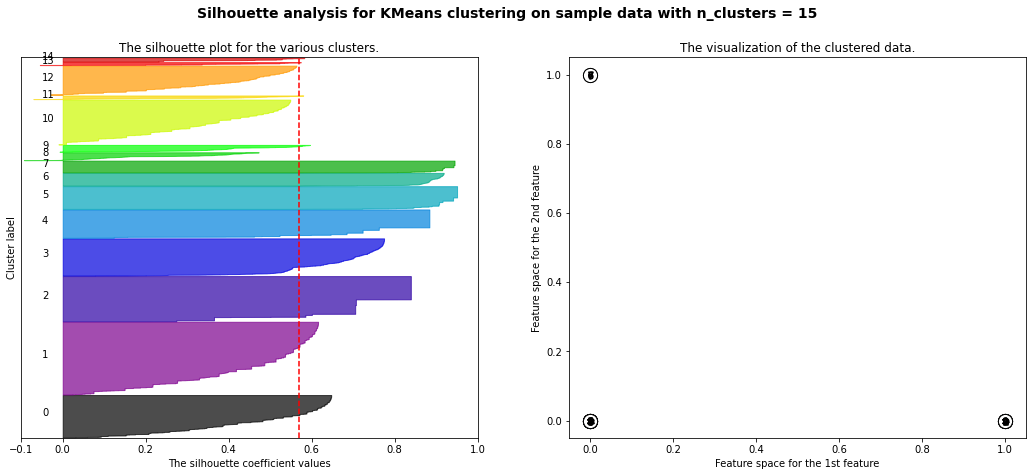

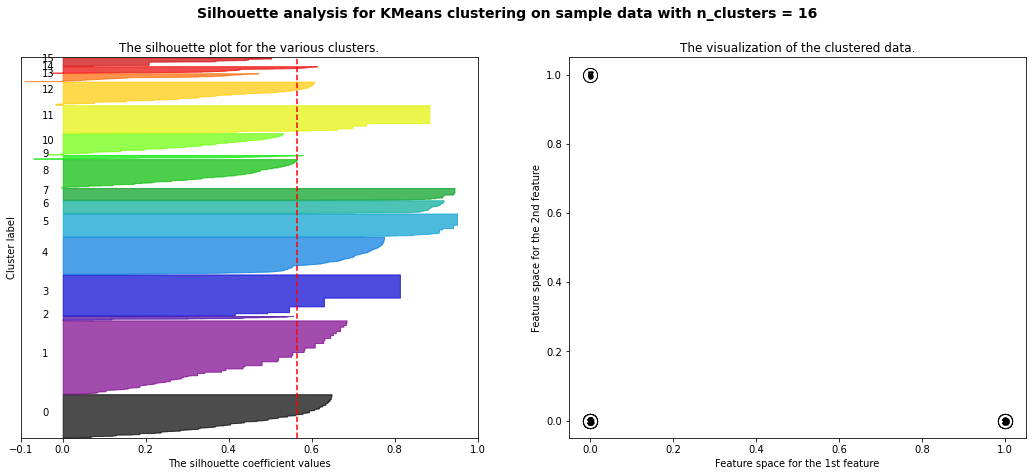

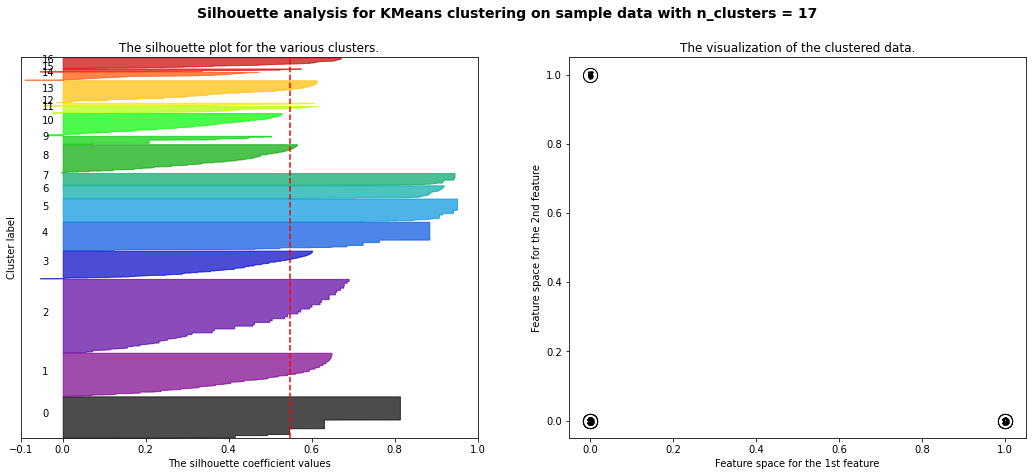

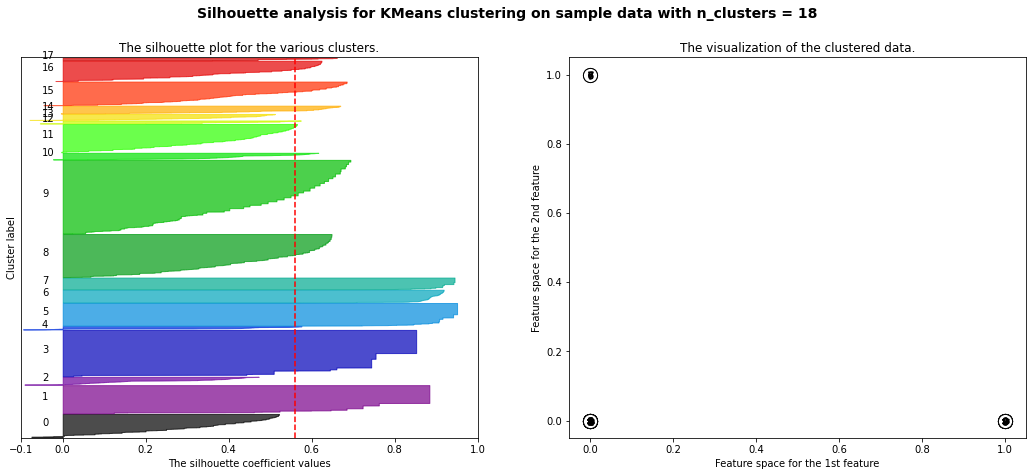

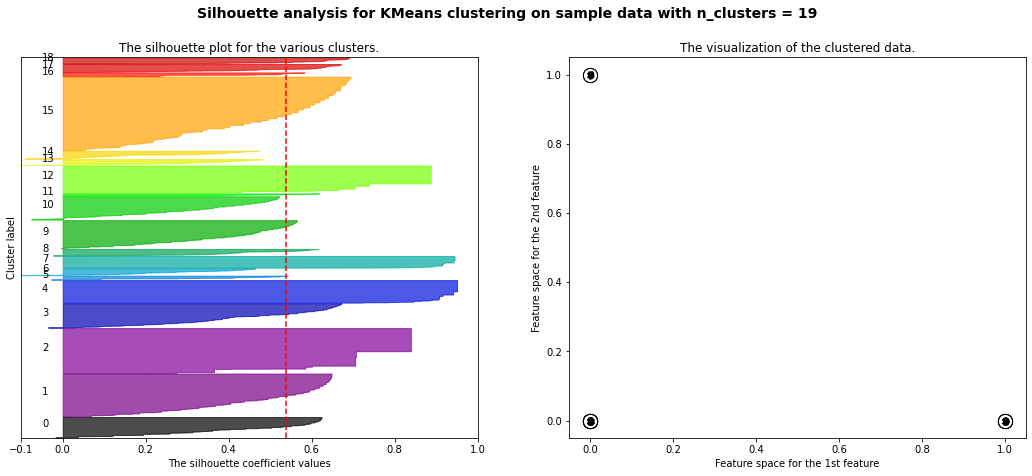

In [ ]:
range_n_clusters = [i for i in range(2,20)]
silhouette_score_ = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

##VISUALIZATION for K = 8 clusters

For visualization, we're taking three significant components using PCA and plotting them 2 the front,side and top view of the 3d space. This way we can see how the clusters are arranged spatially

In [ ]:
#Predicting the clusters
clusterer = KMeans(n_clusters= 8, n_init=10,random_state=10)
preds = clusterer.fit_predict(X)

In [ ]:
#Report update
update_report('KMeans','Default' ,pd.Series(preds).nunique(), silhouette_score(X,preds))

In [ ]:
#Predictions
predictions = pd.DataFrame(preds, columns = ['Clusters'])

In [ ]:
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

reduced = pd.DataFrame(pca.fit_transform(X), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])
kmeans_cluster = pd.concat([reduced, predictions], axis=1)

In [ ]:
#Setting colors for all visualisations
hundred_colors = " #000000 dimgray #696969 silver #c0c0c0 darkslategray #2f4f4f darkolivegreen #556b2f olivedrab #6b8e23 sienna #a0522d seagreen #2e8b57 forestgreen #228b22 maroon2 #7f0000 midnightblue #191970 darkgreen #006400 olive #808000 darkslateblue #483d8b firebrick #b22222 lightslategray #778899 mediumseagreen #3cb371 rosybrown #bc8f8f rebeccapurple #663399 darkgoldenrod #b8860b darkkhaki #bdb76b darkcyan #008b8b steelblue #4682b4 chocolate #d2691e yellowgreen #9acd32 darkblue #00008b indigo #4b0082 limegreen #32cd32 darkseagreen #8fbc8f darkmagenta #8b008b maroon3 #b03060 mediumturquoise #48d1cc mediumaquamarine #66cdaa darkorchid #9932cc orangered #ff4500 orange #ffa500 gold #ffd700 yellow #ffff00 mediumvioletred #c71585 mediumblue #0000cd burlywood #deb887 chartreuse #7fff00 lime #00ff00 mediumorchid #ba55d3 springgreen #00ff7f darksalmon #e9967a crimson #dc143c aqua #00ffff deepskyblue #00bfff sandybrown #f4a460 mediumpurple #9370db blue #0000ff purple3 #a020f0 lightcoral #f08080 greenyellow #adff2f tomato #ff6347 thistle #d8bfd8 fuchsia #ff00ff palevioletred #db7093 khaki #f0e68c laserlemon #ffff54 cornflower #6495ed plum #dda0dd lightgreen #90ee90 lightblue #add8e6 deeppink #ff1493 mediumslateblue #7b68ee violet #ee82ee lightskyblue #87cefa aquamarine #7fffd4 lightgoldenrod #fafad2 hotpink #ff69b4 mistyrose #ffe4e1 lightcyan #e0ffff pink #ffc0cb"
colors = [color for color in hundred_colors.split(' ') if '#' in color]

#Looping to shuffle colors
np.random.seed(151203)
shuffled = []
while len(colors)!=0:
  a = np.random.choice(colors)
  shuffled.append(a)
  colors.remove(a)

In [ ]:
gyr = shuffled[:pd.Series(preds).nunique()]

In [ ]:
sns.color_palette(gyr)

[(1.0, 0.4117647058823529, 0.7058823529411765),
 (0.2823529411764706, 0.23921568627450981, 0.5450980392156862),
 (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
 (0.5764705882352941, 0.4392156862745098, 0.8588235294117647),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353),
 (1.0, 0.38823529411764707, 0.2784313725490196),
 (1.0, 0.6470588235294118, 0.0),
 (1.0, 1.0, 0.0)]

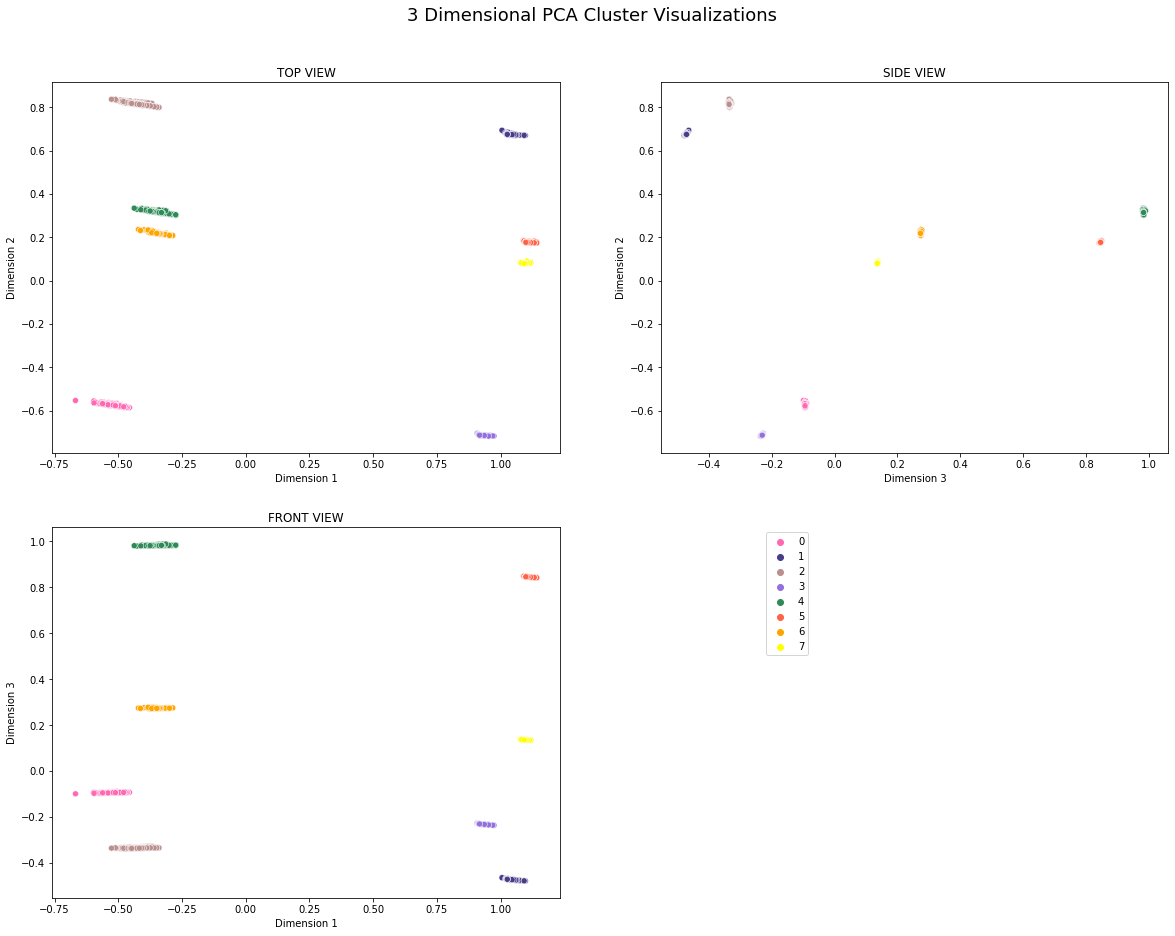

In [ ]:
# Visualization of the clusters
from matplotlib import transforms
plt.figure(figsize=(20,15))
plt.suptitle("3 Dimensional PCA Cluster Visualizations", fontsize=18, y=0.95)

plt.subplot(2,2,1)
plt.title('TOP VIEW')
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 2', data = kmeans_cluster, hue = 'Clusters',palette = sns.color_palette(gyr), legend=False
                )

plt.subplot(2,2,2)
plt.title('SIDE VIEW')
palette = {0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5",
           6: "C6", 7: "C7", 8: "C8", 9: "C9", 10: "C10", 11: "C11",
           12: "C12", 13: "C13", 14: "C14", 15: "C15", 16: "C16"}
sns.scatterplot(x = 'Dimension 3', y = 'Dimension 2', data = kmeans_cluster, hue = 'Clusters',palette = sns.color_palette(gyr), legend=False)

plt.subplot(2,2,3) 
plt.title('FRONT VIEW')
palette = {0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5",
           6: "C6", 7: "C7", 8: "C8", 9: "C9", 10: "C10", 11: "C11",
           12: "C12", 13: "C13", 14: "C14", 15: "C15", 16: "C16"}
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 3', data = kmeans_cluster, hue = 'Clusters',palette = sns.color_palette(gyr))
plt.legend(bbox_to_anchor=(1.5,1))


##Hierarchial CLustering

In [ ]:
# Let's import sch
import scipy.cluster.hierarchy as sch
hier_ward_euc = sch.linkage(X, method = 'ward', metric = 'euclidean')

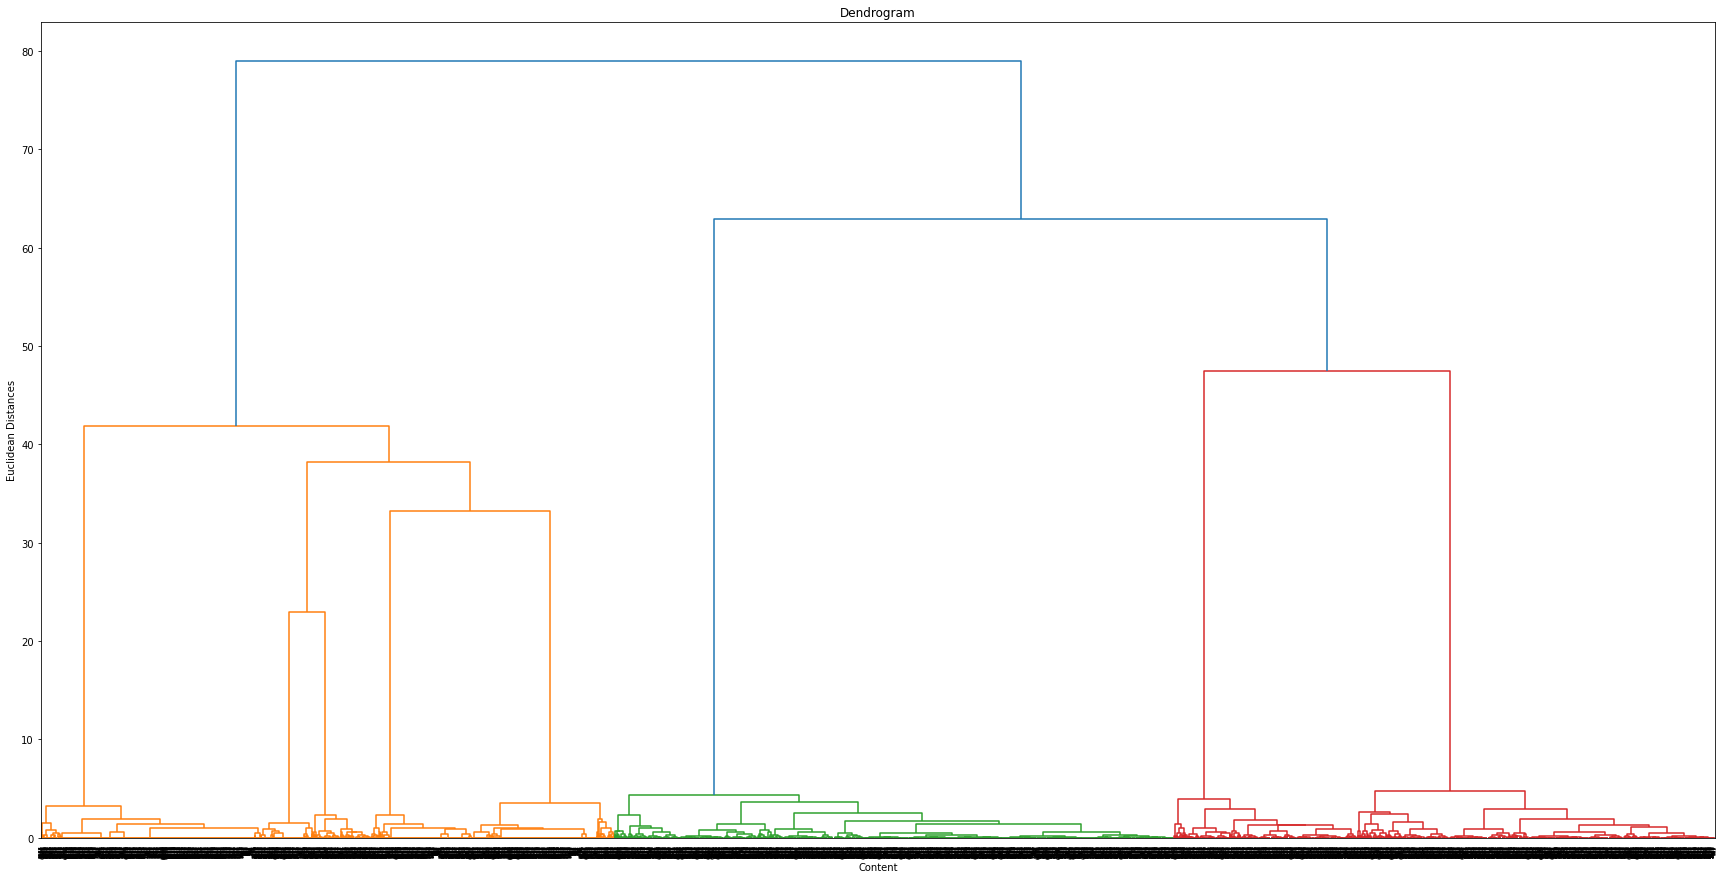

In [ ]:
# Plotting the Dendogram 
plt.figure(figsize=(30,15))
dendrogram = sch.dendrogram(hier_ward_euc)
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

##CHOOSING THE APPROPRIATE DISTANCE TO CLUSTER

##Agglomerative Clustering

In [ ]:
#Agglomerative Clustering to find out optimal number of clusters
clusters = []
scores = []
distances = []
for i in np.arange(5,75,5):
  hc = AgglomerativeClustering(n_clusters = None, distance_threshold = i, affinity = 'euclidean', linkage = 'ward')
  y_hc = hc.fit_predict(X)
  clusters.append(hc.labels_.max()+1)
  if (hc.labels_.max()+1 >=2) :
    scores.append(silhouette_score(X, y_hc))
  else:
    scores.append(1)
  distances.append(i)

hierarchical = pd.DataFrame({'Clusters': clusters, 
                             'Silhouette Scores': scores,
                             'Distance': distances})

##DISTANCE vs SILHOUETTE SCORES GRAPH FOR HIERARCHICAL CLUSTERING

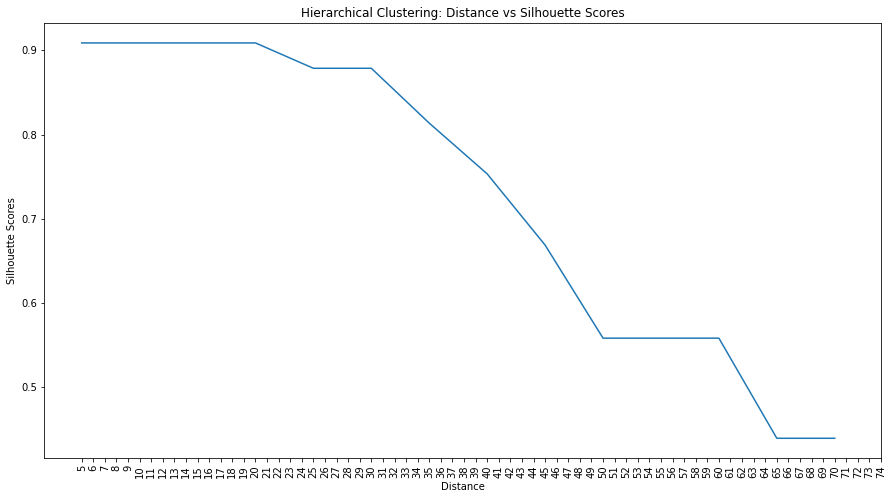

In [ ]:
#Distance vs silhoette score
plt.figure(figsize =(15,8))
sns.lineplot(x = 'Distance', y = 'Silhouette Scores' , data = hierarchical)
a = plt.title('Hierarchical Clustering: Distance vs Silhouette Scores')
_ = plt.xticks(np.arange(5,75,1),rotation = 90)

In [ ]:
#Hierachial clusting report
hierarchical.sort_values('Silhouette Scores', ascending = False).head()

Clusters  Silhouette Scores  Distance
0         8           0.908898         5
1         8           0.908898        10
2         8           0.908898        15
3         8           0.908898        20
4         7           0.878767        25


**Highest Silhouette Score of 0.90 achieved at distance = 20 with 8 clusters**

## TOPIC MODELING USING LDA

In [ ]:
#Input for topic modelling
topic_input = df['Processed Description'] + ' ' + df['Processed Movie Deets']

In [ ]:
#Importing Dictionary
from gensim.corpora import Dictionary
gensim_paragraphs = (topic_input).apply(lambda row: row.split(' '))

# dictionary of corpus
dict_gensim_para = Dictionary(gensim_paragraphs) 
dict_gensim_para.filter_extremes(no_below=5, no_above=0.6)

#Creating corpus
bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) for paragraph in gensim_paragraphs] #creating corpus

TFIDF VECTOR

In [ ]:
#Importing TfidModel
from gensim.models import TfidfModel

#Fitting the model
tfidf_gensim_para = TfidfModel(bow_gensim_para)
vectors_gensim_para = tfidf_gensim_para[bow_gensim_para]

In [ ]:
#Coherence score for different topics
lda_para_model_n = []
for n in (range(5, 9)):
  lda_model = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=1000, eta='auto', iterations=400,
                            num_topics=n, passes=20, eval_every=None,
                            random_state=42)
  lda_coherence = CoherenceModel(model=lda_model, texts=gensim_paragraphs,
                            dictionary=dict_gensim_para, coherence='c_npmi') 
  print(n,'|', lda_coherence.get_coherence())
  lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))

5 | 0.01190329303888941
6 | -0.015238251583984131
7 | 0.001313331361887975
8 | 0.015704875659170968


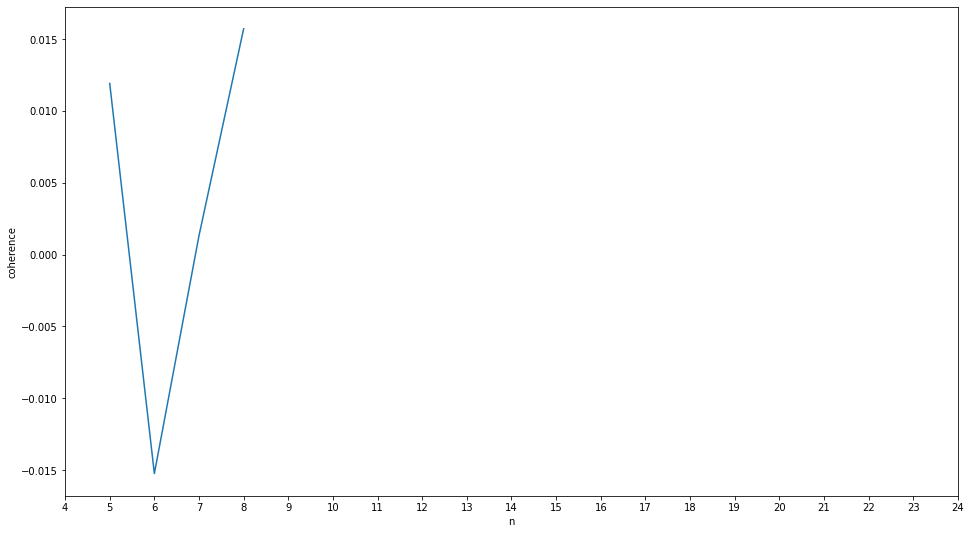

In [ ]:
#Coherence vs no. of topics
lda_df = pd.DataFrame(lda_para_model_n, columns=["n", "model", "coherence"]).set_index("n")[["coherence"]]
plt.figure(figsize=(16,9))
_ = sns.lineplot(x='n', y='coherence', data=lda_df )
_ = plt.xticks(ticks = np.arange(4,25,1))

In [ ]:
#Number of topics
lda_df = lda_df.reset_index()
topic_nums = lda_df[lda_df['coherence']==lda_df['coherence'].max()]['n'].to_list()[0]
topic_nums

8

In [ ]:
lda_gensim_para = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=2000, eta='auto', iterations=400,
                            num_topics= topic_nums , passes=20, eval_every=None,
                            random_state=42)

In [ ]:
#function to display gensim topics
def display_gensim_topics(model):
  gen_list = lda_gensim_para.print_topics()
  for i in range(0,len(gen_list)):
    print('Topic: ',i+1,'\n')
    topics = gen_list[i][1]
    for j in topics.split('+'):
      print(j.split('"')[1])

    print("------\n")

display_gensim_topics(lda_gensim_para)

Topic:  1 

comedy
drama
romance
love
life
young
woman
find
man
new
------

Topic:  2 

drama
actionadventure
thriller
young
famili
scififantasy
man
becom
find
war
------

Topic:  3 

drama
comedy
famili
live
take
life
year
find
face
father
------

Topic:  4 

actionadventure
drama
crime
comedy
team
agent
cop
take
thriller
find
------

Topic:  5 

family
comedy
kids
school
friend
high
adventur
new
get
teen
------

Topic:  6 

documentary
documentari
music
world
seri
reality
stori
explor
life
sports
------

Topic:  7 

comedy
special
stand
anime
power
take
comedi
kids
actionadventure
comic
------

Topic:  8 

drama
crime
horror
thriller
murder
mysteri
young
investig
famili
case
------



In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
#Notebook containig different topics with corresonding top words
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(lda_gensim_para, bow_gensim_para, dict_gensim_para)

p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.031881  0.000693       1        1  19.295646
5     -0.201036  0.169812       2        1  15.629148
1      0.114119  0.033599       3        1  14.465862
4     -0.074377 -0.150569       4        1  12.123776
7      0.129107  0.002640       5        1  11.493993
3      0.109360  0.030561       6        1  11.241013
6     -0.112372 -0.135603       7        1   8.542795
2      0.003317  0.048867       8        1   7.207767, topic_info=             Term         Freq        Total Category  logprob  loglift
171   documentary  1060.000000  1060.000000  Default  30.0000  30.0000
389       romance   812.000000   812.000000  Default  29.0000  29.0000
3           drama  2862.000000  2862.000000  Default  28.0000  28.0000
241        comedy  2305.000000  2305.000000  Default  27.0000  27.0000
1015       family   488.000000   488.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
260           old    26.670191   285.260544   Topic8  -5.7821   0.2602
240           boy    25.408770   195.161755   Topic8  -5.8306   0.5913
236         stori    25.172754   287.019091   Topic8  -5.8399   0.1962
113           new    25.904838   624.272120   Topic8  -5.8112  -0.5521
62          world    24.880690   512.105675   Topic8  -5.8516  -0.3944

[608 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
2876      8  0.976897             1990
3166      8  0.989742             20th
3281      6  1.004747                5
2238      2  0.980633          account
48        1  0.007265  actionadventure
...     ...       ...              ...
238       7  0.065200            young
238       8  0.048900            young
2186      3  0.939823   youssefchahine
4179      1  0.054522    yılmazerdoğan
4179      3  0.926869    yılmazerdoğan

[1590 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 2, 5, 8, 4, 7, 3])

##**CONCLUSIONS** :

## 1 . Exploratory Data Analysis



*   **Majority of content avaiable on Netflix is Movies.**
*   **Growth in the number of movies on Netflix is much higher than tv shows**.**The highest number of movies and tv shows got added in 2019 and 2020**


*   **October, November, December, and January are months in which many shows and movies get uploaded to the platform**.
*   **Most of the content gets uploaded in the beginning and the middle of the month**.



*   **United States and India are the top countries that produce all of the available content on the platform**.
*   **TV-MA tops the charts, indicating that mature content is more popular on Netflix**




*   **Top Genres on Netflix are found to be : Drama, Comedy, Documentary, Action and Adventure, Romance etc**.






##2. Analysis of Content produced in different countries



*   **The United States is a leading producer of both types of content which is obvious as Netflix is US Based company**. **It is followed by India where most of the content is in the form of movies**



*   **Drama is the most produced genre in a lot of Non-English speaking countries**
*   **Comedy is the most produced genre in English speaking countries like United States of America, United Kingdom and Canada**


*   **Drama and Comedy are the most produced genres in the top countries with exceptions of Japan and South Korea**
*   **Japan is the biggest producer of Anime. Anime is also the most produced in genre in Japan**






##3. Is Netflix has increasingly focusing on TV rather than movies in recent years.



*   **We have observed that TV shows signed have been higher than movies in 2016**.


*   **While the no of movies signed were higher, it can be seen that the TV shows signed per year is catching up with the movies signed year by year**.



## Clustering 


*   **k=8 is found to be an optimal value for clusters with highest silhouette score of 0.909 using which we grouped our data into 8 distinct clusters.**


 

*  **Using dendograms and comparing various distance thresholds, a distance of 20** **produced the highest silhouette score of 0.90 with 8 clusters produced the** **highest silhouette score of 0.90 with 8 clusters**


.



##Topic Modelling


  

*   **Latent Drichlet Allocation is used to model textual data[description, genres, directors and cast] into topics**


*   **Seven topics are found to be the most suitable upon comparing Coherence Scores for different topic numbers**


*   **The Topics and corresponding top words are given down below:**

***Topic 1***
1. Comedy 
2. Drama
3. Romance
4. Love
5. Life

***Topic 2***
1. Documentary
2. Music
3. World
4. Seri
5. Reality

***Topic 3***
1. Drama
2. Action & Adventure
3. Thriller
4. Young
5. Family


***Topic 4***

1. Crime
2. Drama
3. Murder
4. Thriller
5. Comedy


***Topic 5***

1. Family
2. Comedy
3. Kids
4. School
5. Friend


***Topic 6***
1. Action & Adventure
2. Drama
3. Crime
4. Comedy
5. Team



***Topic 7***

1. Comedy
2. Special 
3. Stand
4. anime
5. power


